In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}


<IPython.core.display.Javascript object>

In [2]:
from __future__ import  division
%matplotlib inline
from data_tools import draw_all_datasets, draw_word_venn, draw_bar_chart, draw_word_venn_3
from data_tools import get_dict_from_file, get_names_from_files
import itertools

# Datasets

For the research, I am taking into account the most popular datasets as COCO objects, Pascal VOC, ADE20K, CityScapes, and their extensions COCO Stuff and Pascal VOC Context. COCO stuff does not contain COCO objects; Pascal Voc is a subset of Pascal VOC Context. ADE20K has curse segmentation, but there is segmentation of hierarchical objects (for the statistic I consider only the first level of hierarchy). In following files, I collected information how often each label appears in the dataset.

In [3]:
PATH = "datasets/"
dataset_filenames = {"coco":PATH+"coco.txt", 
                     "voc":PATH+"pascal_voc.txt", 
                     "voc_contex":PATH+"pascal_voc_context.txt", 
                     "cocostuff":PATH+"cocostuff.txt",
                     "citiscapes":PATH+"citiscraper.txt",
                     "ade20k":PATH+"ade20k.txt"}
total_number_of_pictures = {"coco":82783, 
                            "voc":2913, 
                            "voc_contex": 10103, 
                            "cocostuff":82783,
                            "citiscapes":5000,
                            "ade20k": 22210}

# Visualization

## Overview of the datasets 

It is a visualization of the labels in different datasets. The size of the circles inside the datasets corresponds to the occurrence of the label through the dataset. In VOC and COCO "person" is the label which occurs the most. Also, an interesting moment that in CocoStuff label "other" has the most occurrences. The lables are quite diverse and have reasonable density, and except ADE20K where some of the labels have 1-2 number of occurrences.

In [4]:
draw_all_datasets(dataset_filenames)

## Pair of the datasets

Also, I was interested in the relationship between two/three datasets. I have used Venn's diagram to have a visual look at the relations among datasets. The observation is: every two datasets have intersections, and we can use!

In [ ]:
combinations_2 = itertools.combinations(dataset_filenames.keys(),2)
for comb in combinations_2:
    try:
        draw_word_venn(dataset_filenames, comb[0], comb[1])
    except:
        print("Problem in rendering Word Venn's diagram",(comb[0], comb[1]) )

("Problem in rendering Word Venn's diagram", ('cocostuff', 'voc_contex', 'voc'))


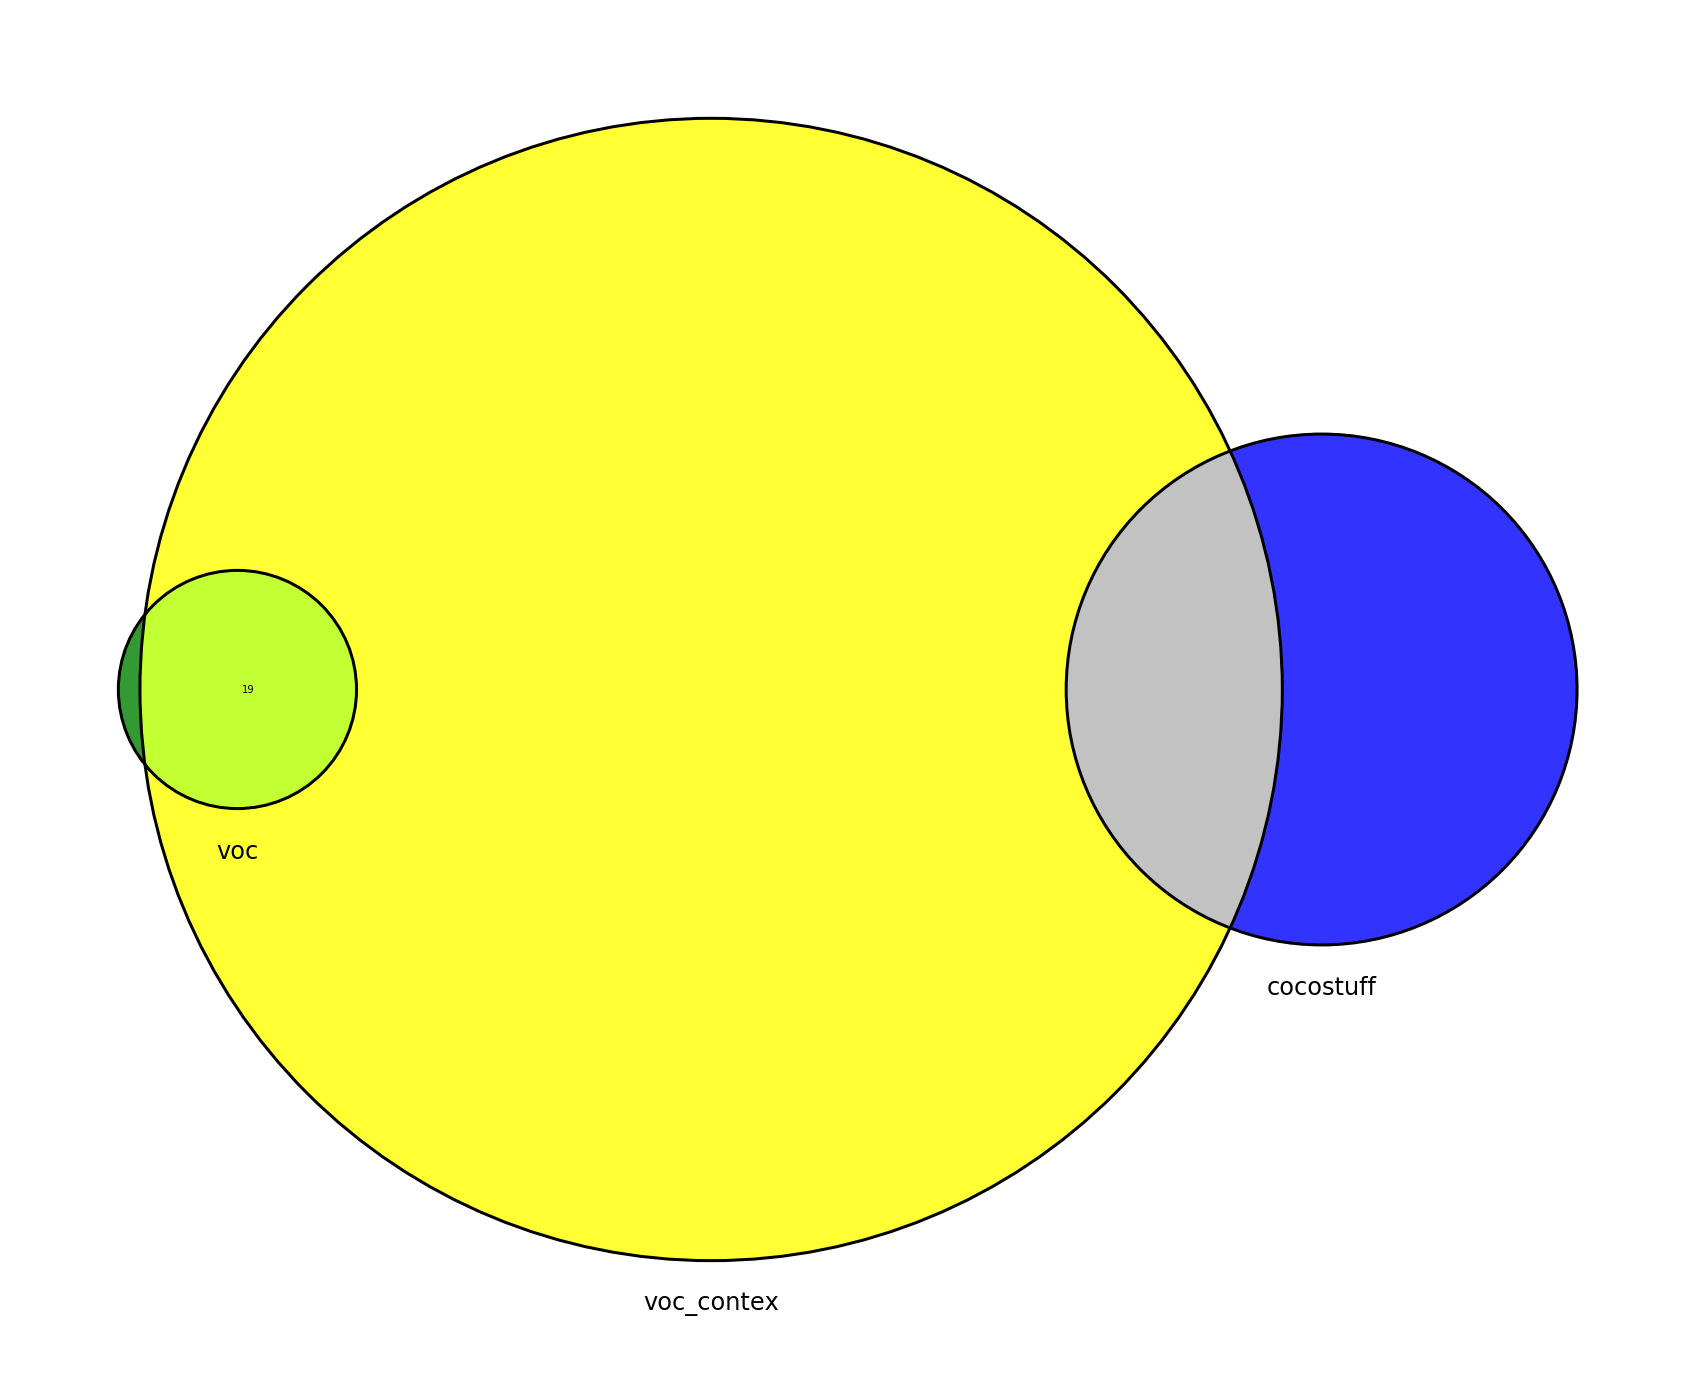

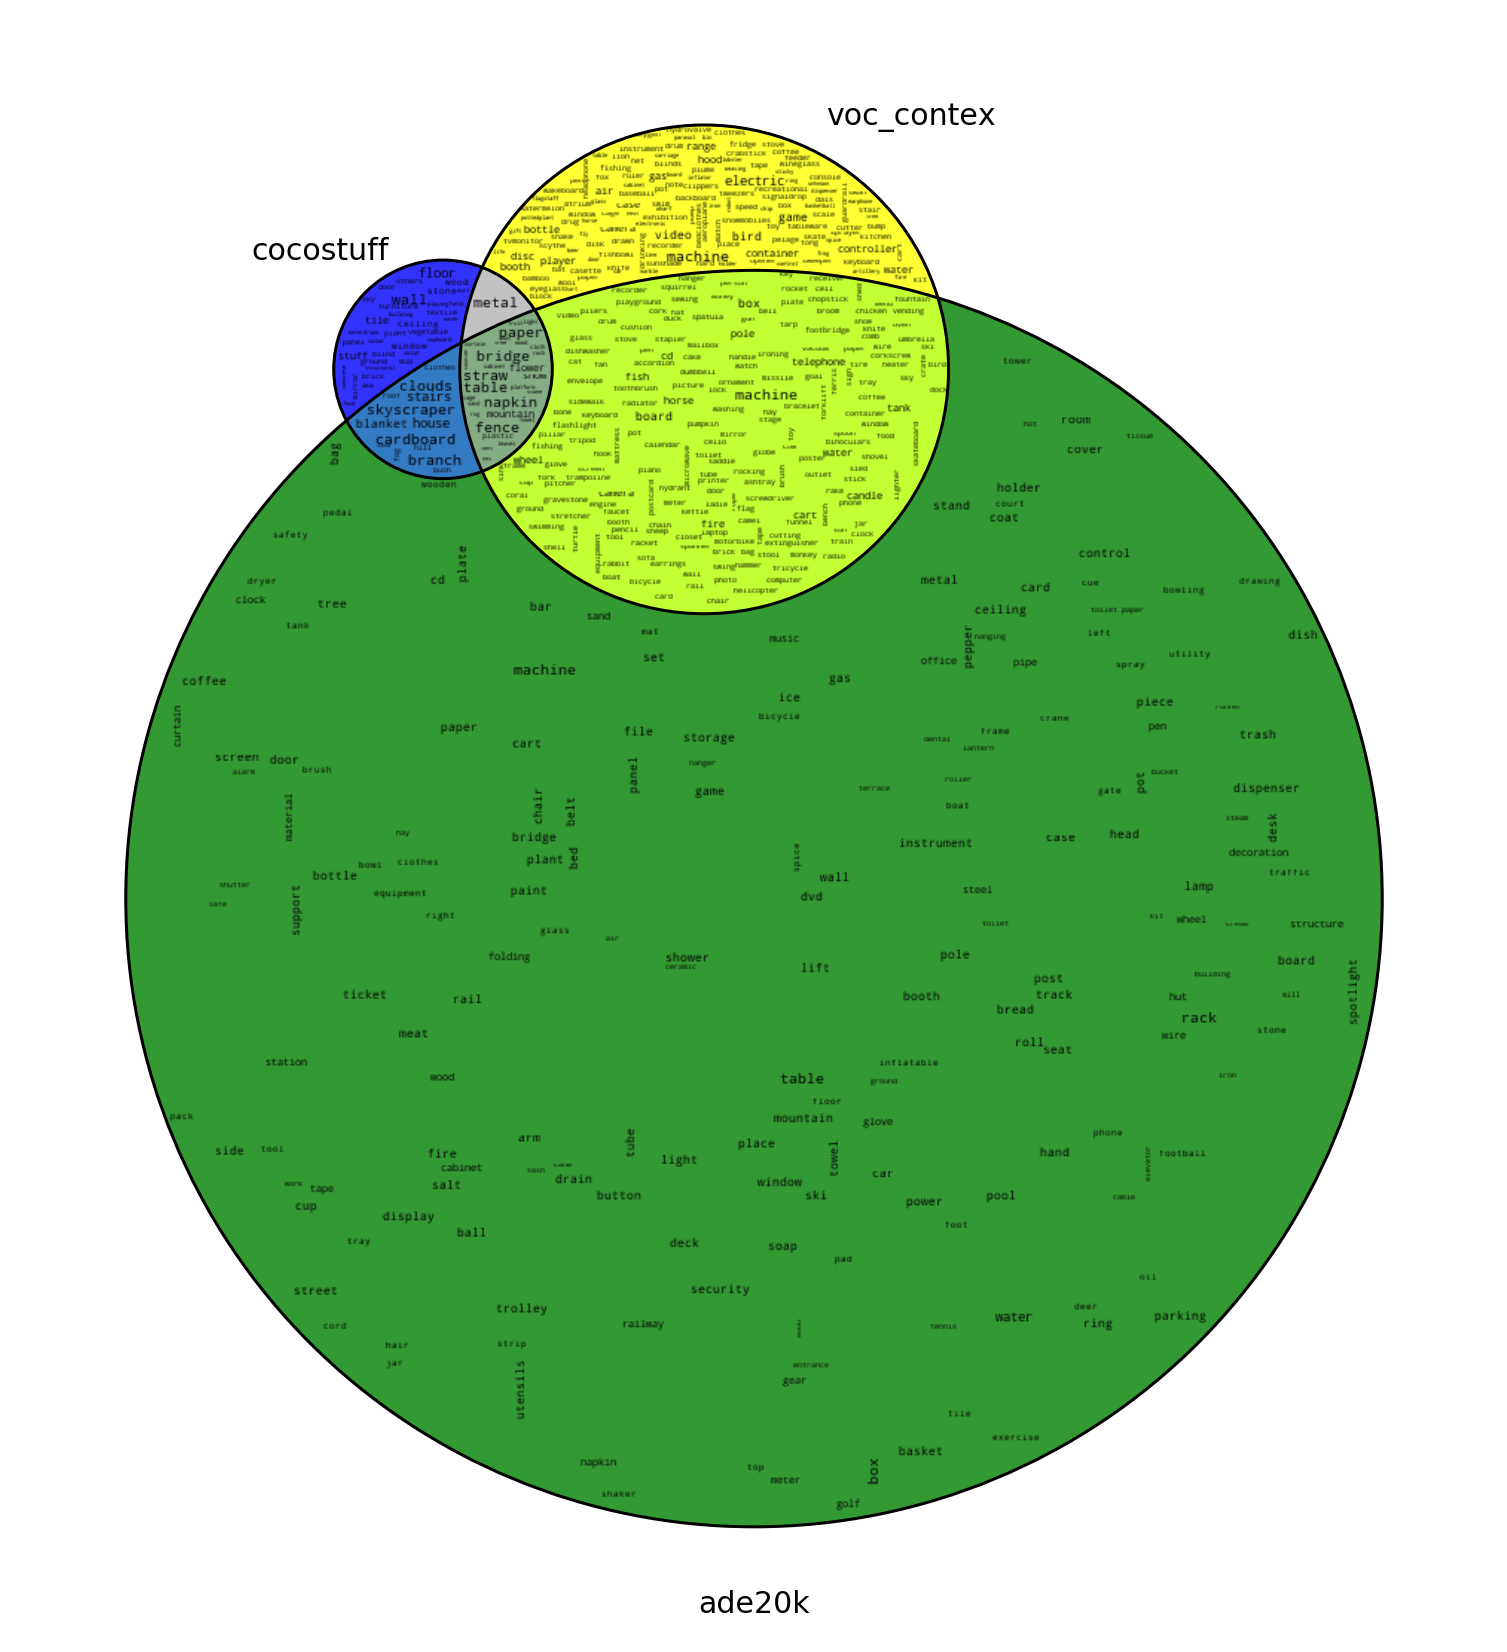

("Problem in rendering Word Venn's diagram", ('cocostuff', 'voc_contex', 'coco'))


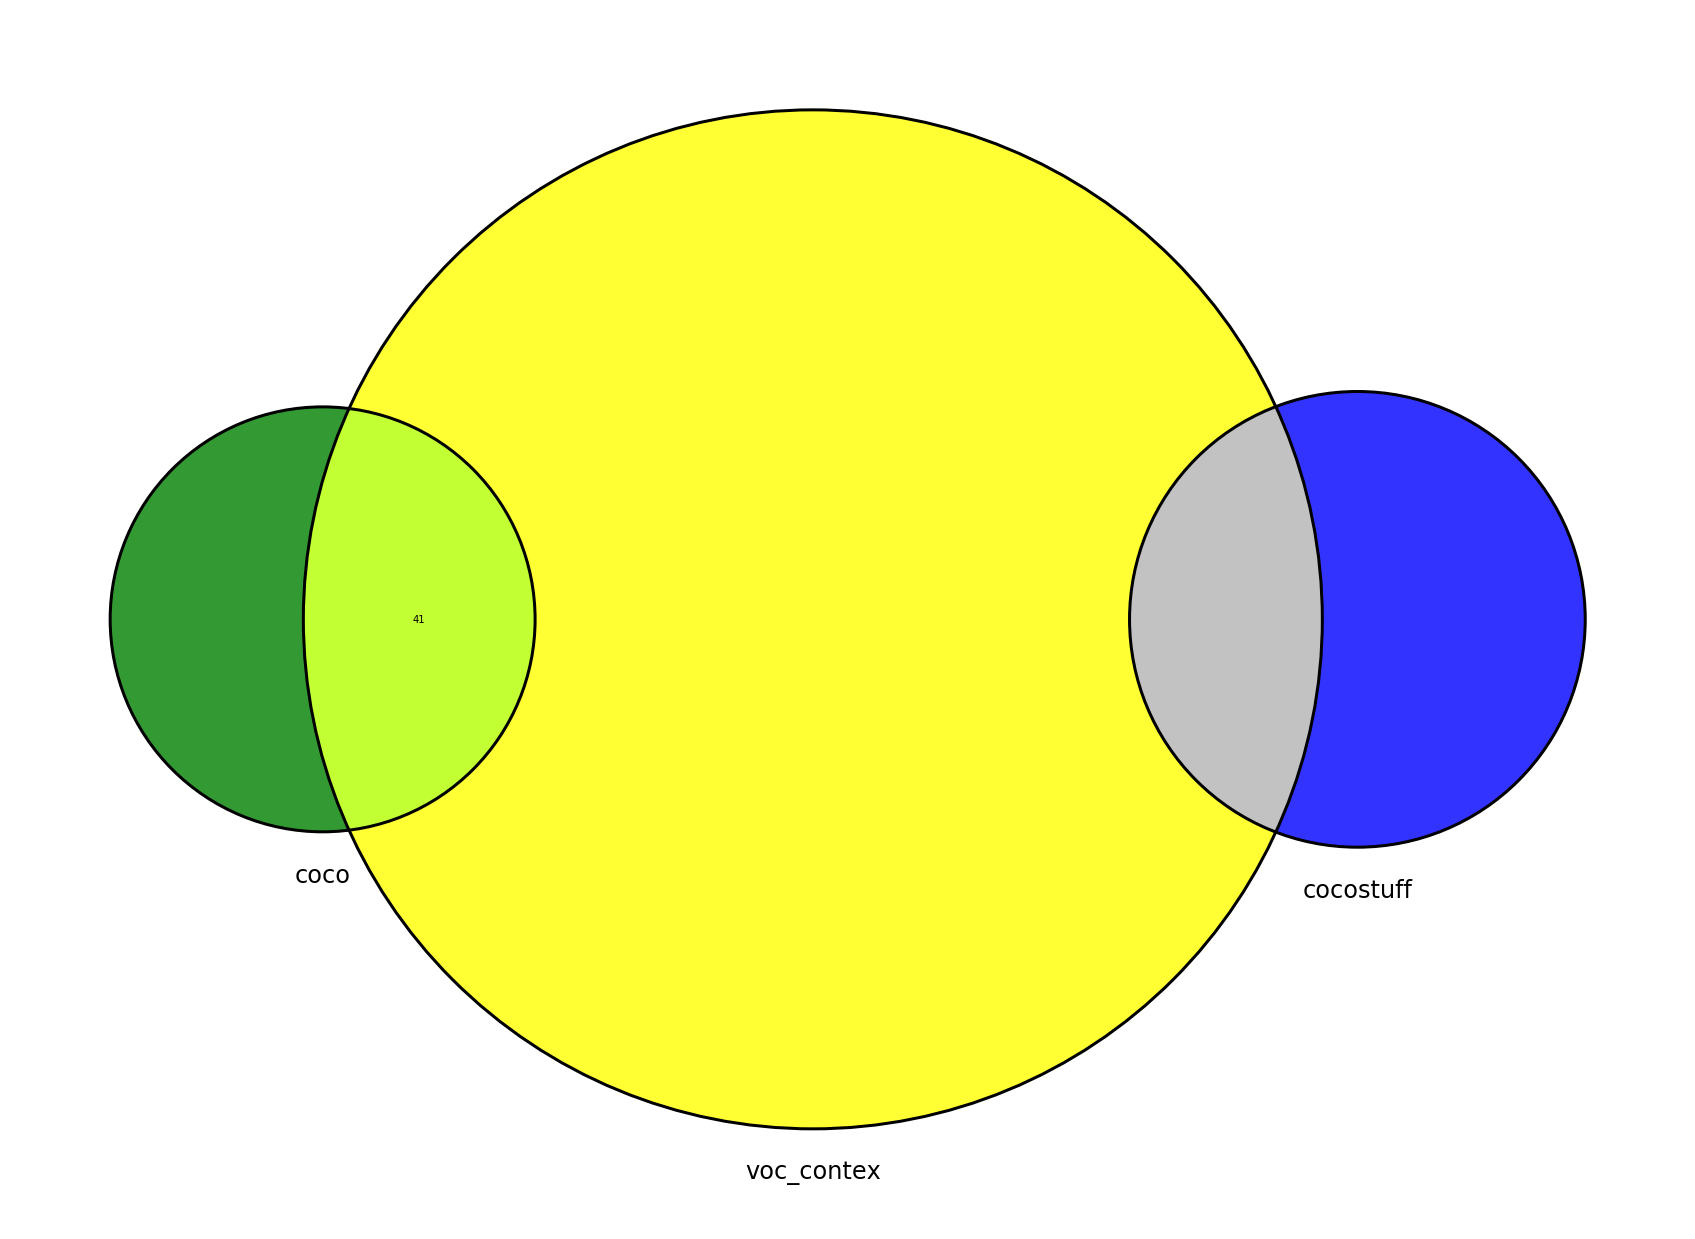

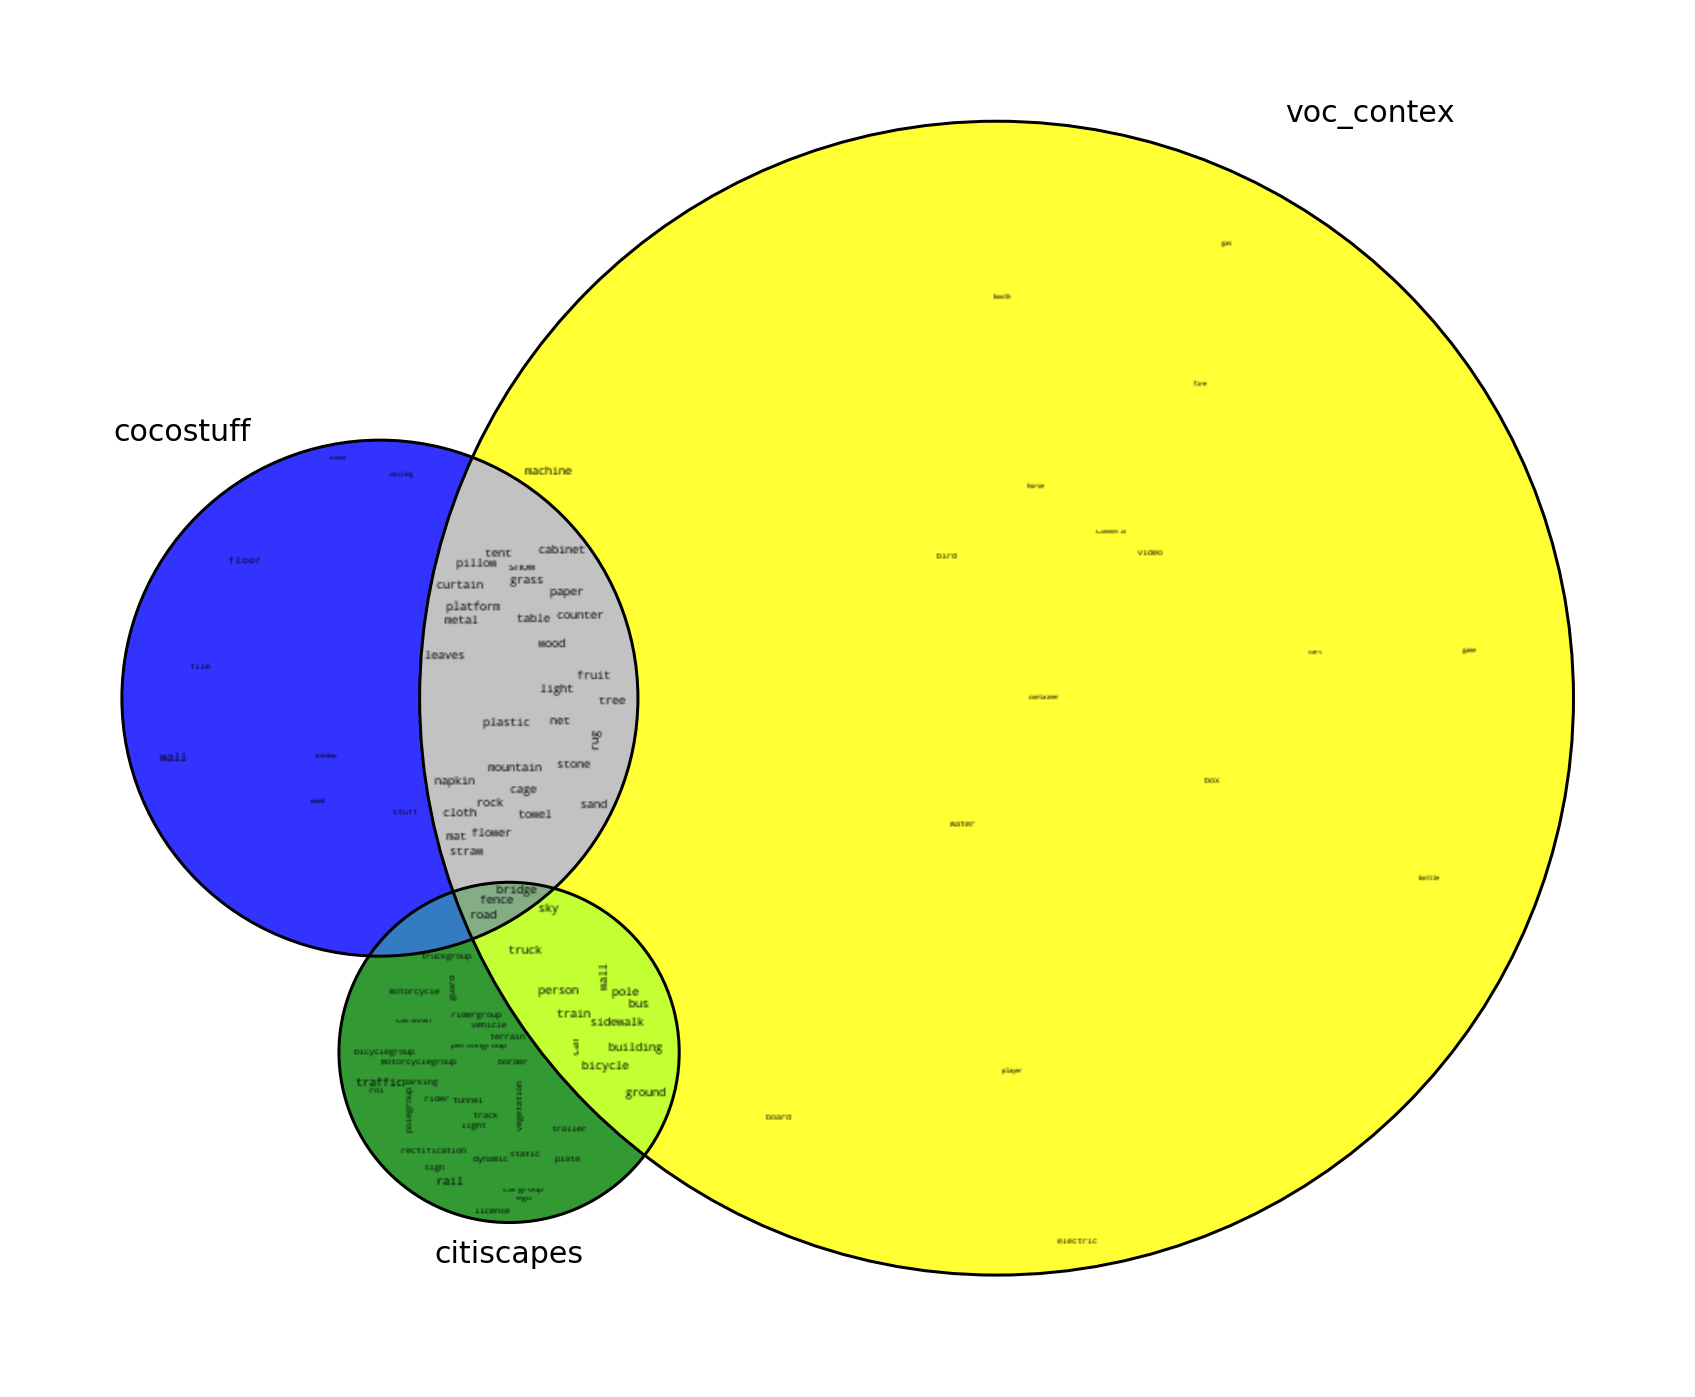

("Problem in rendering Word Venn's diagram", ('cocostuff', 'voc', 'ade20k'))
("Problem in rendering Word Venn's diagram", ('cocostuff', 'voc', 'coco'))
("Problem in rendering Word Venn's diagram", ('cocostuff', 'voc', 'citiscapes'))
("Problem in rendering Word Venn's diagram", ('cocostuff', 'ade20k', 'coco'))


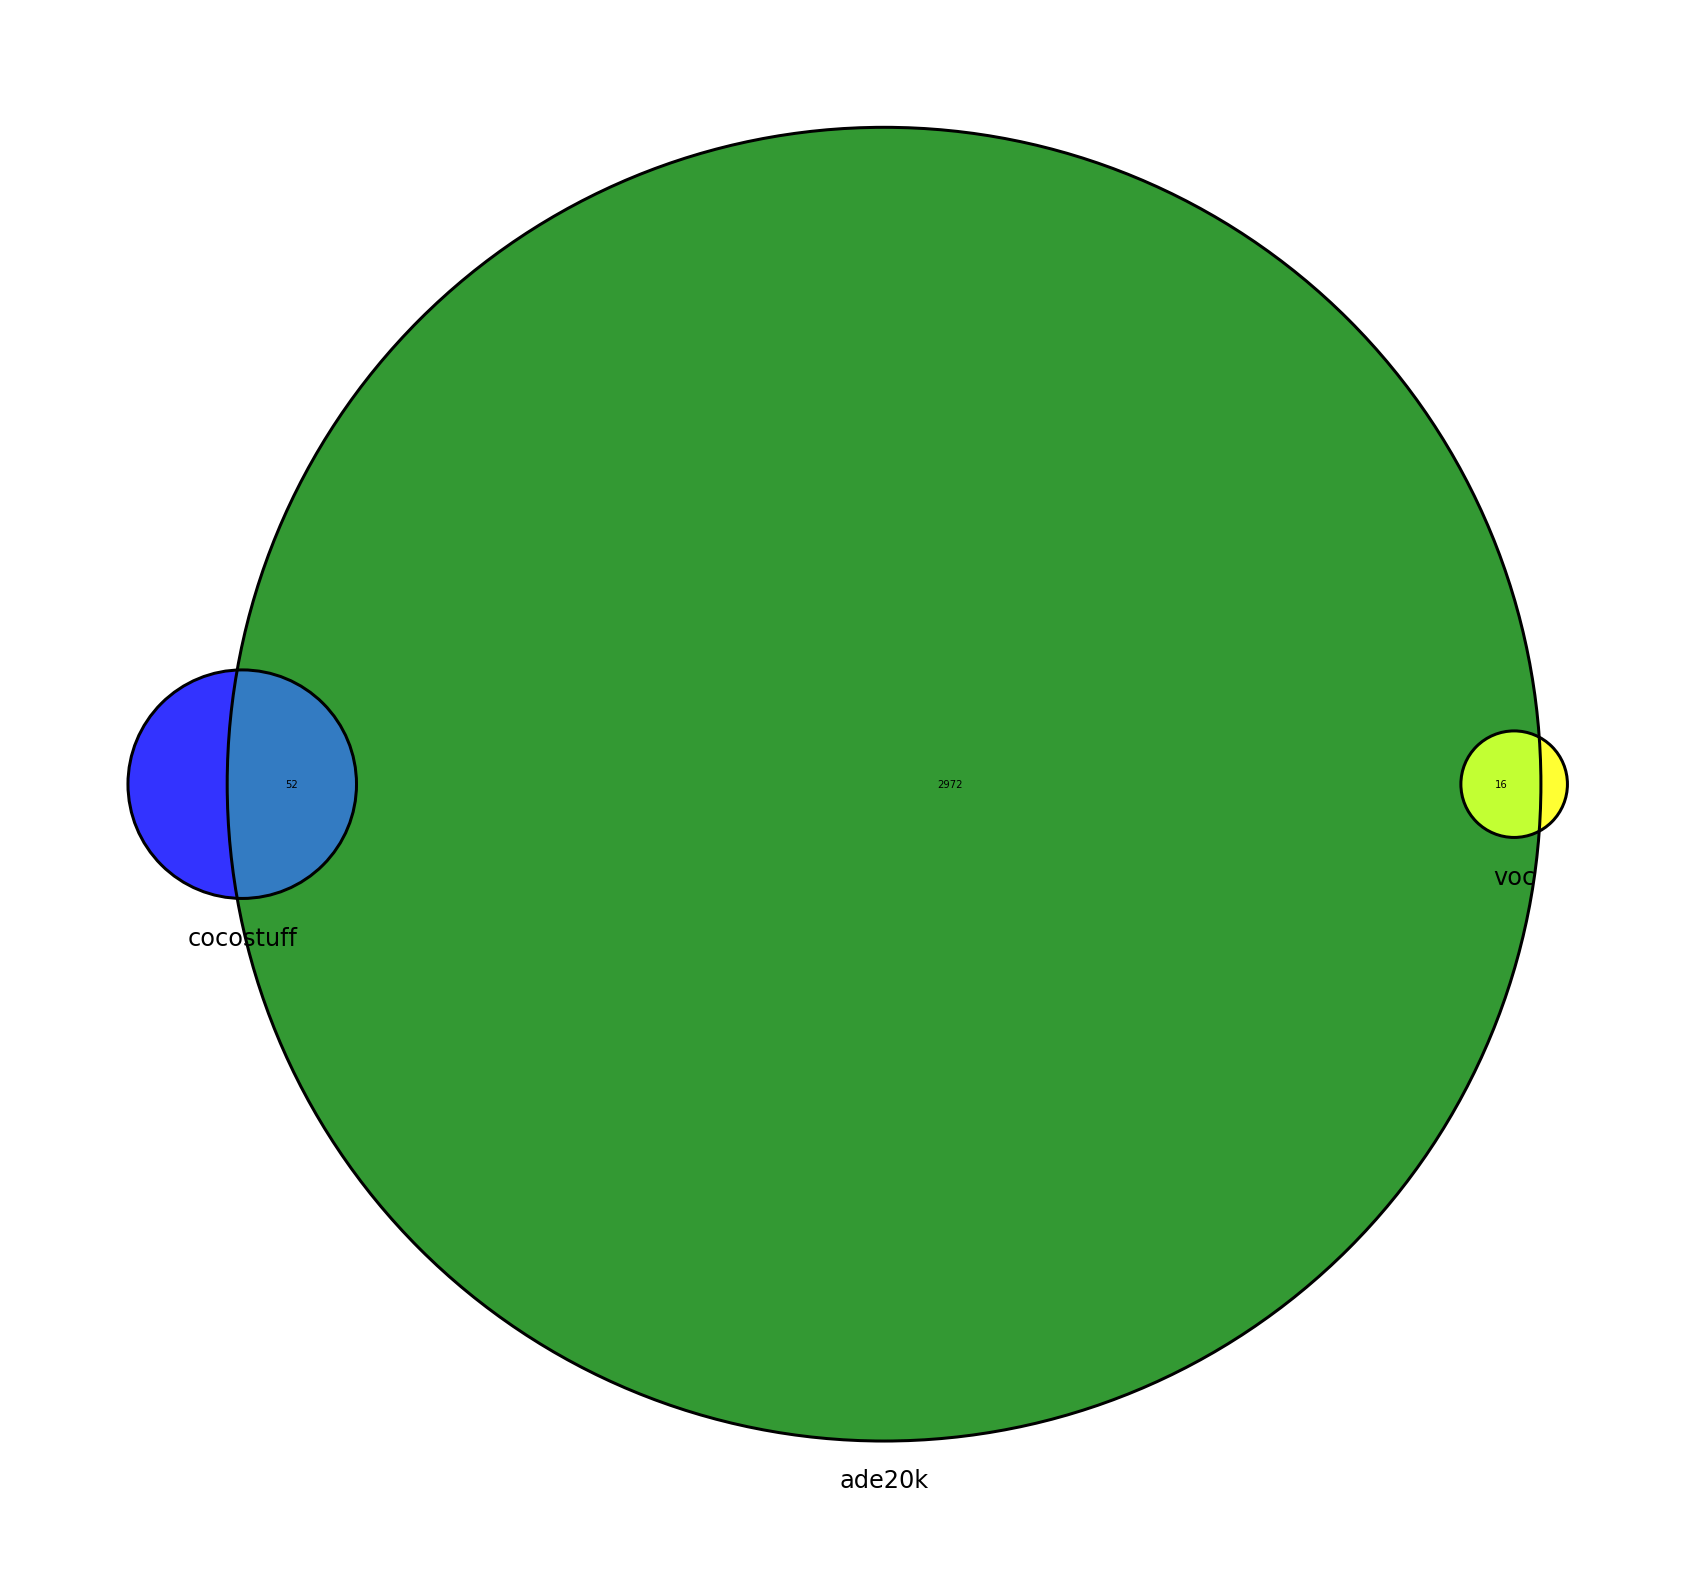

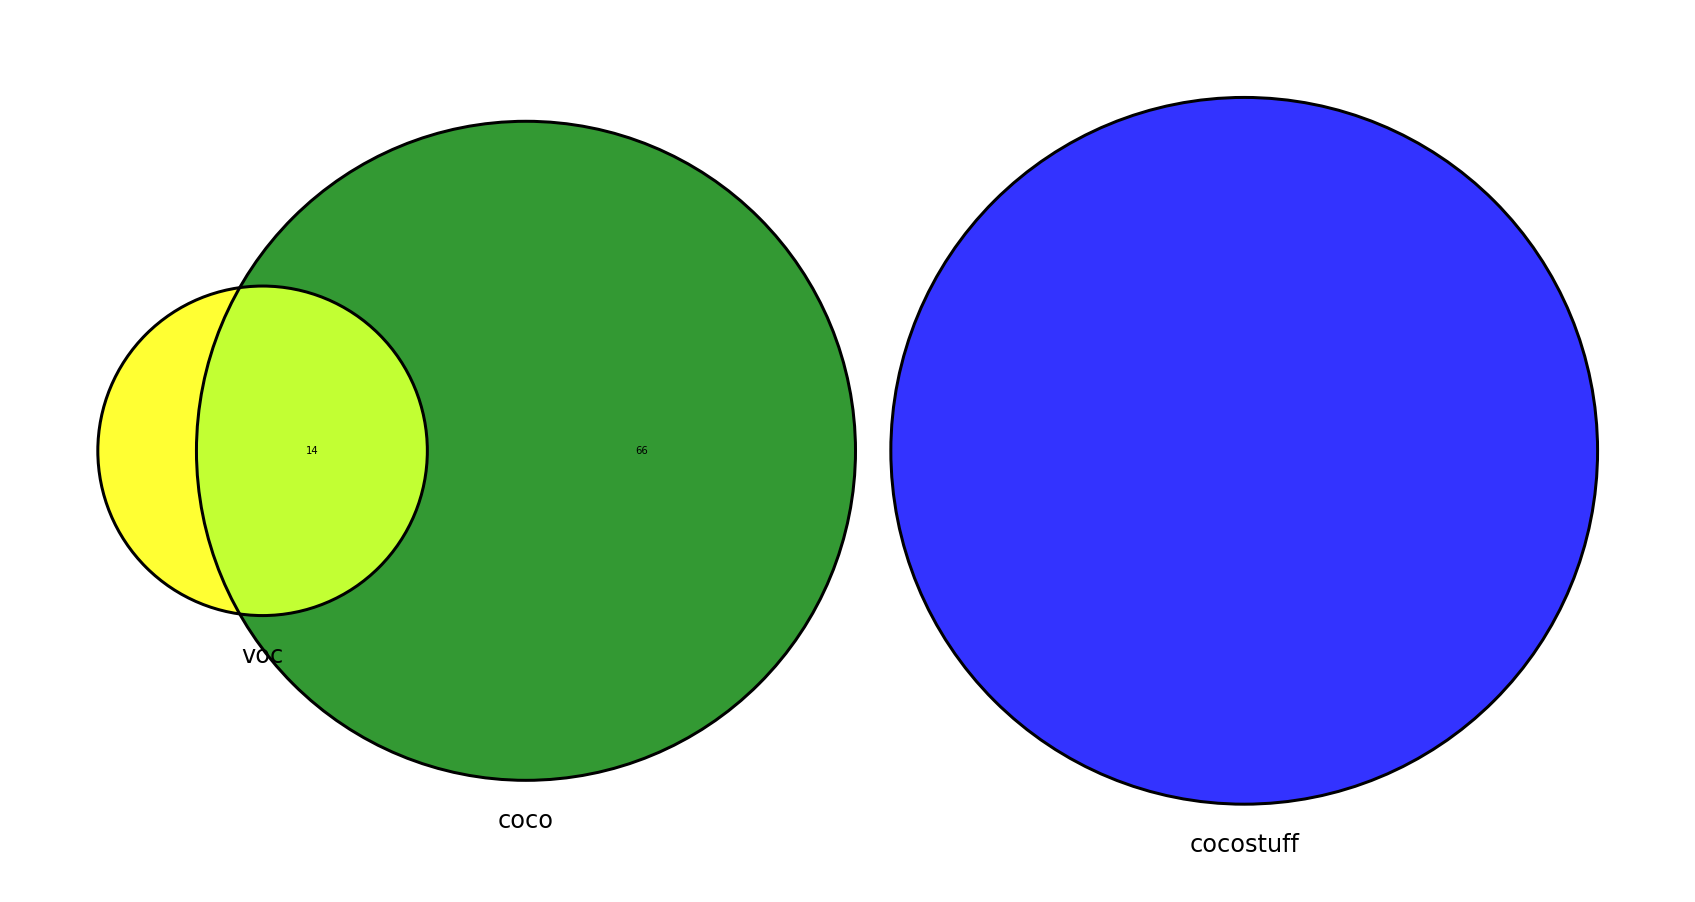

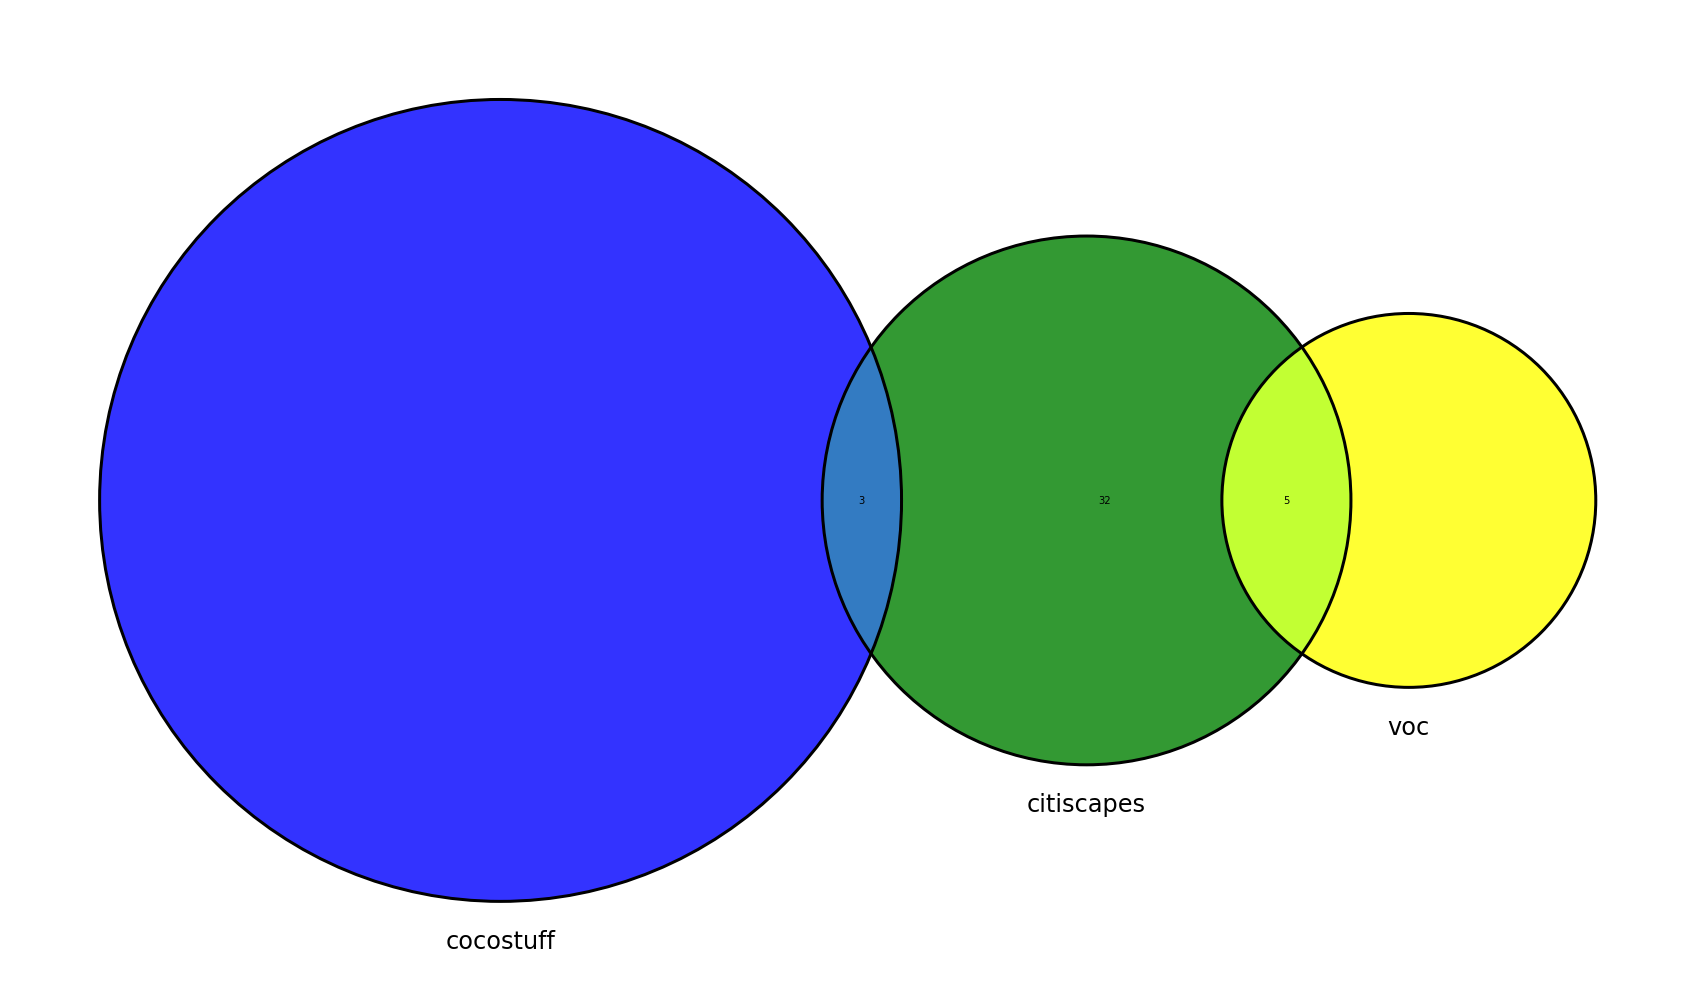

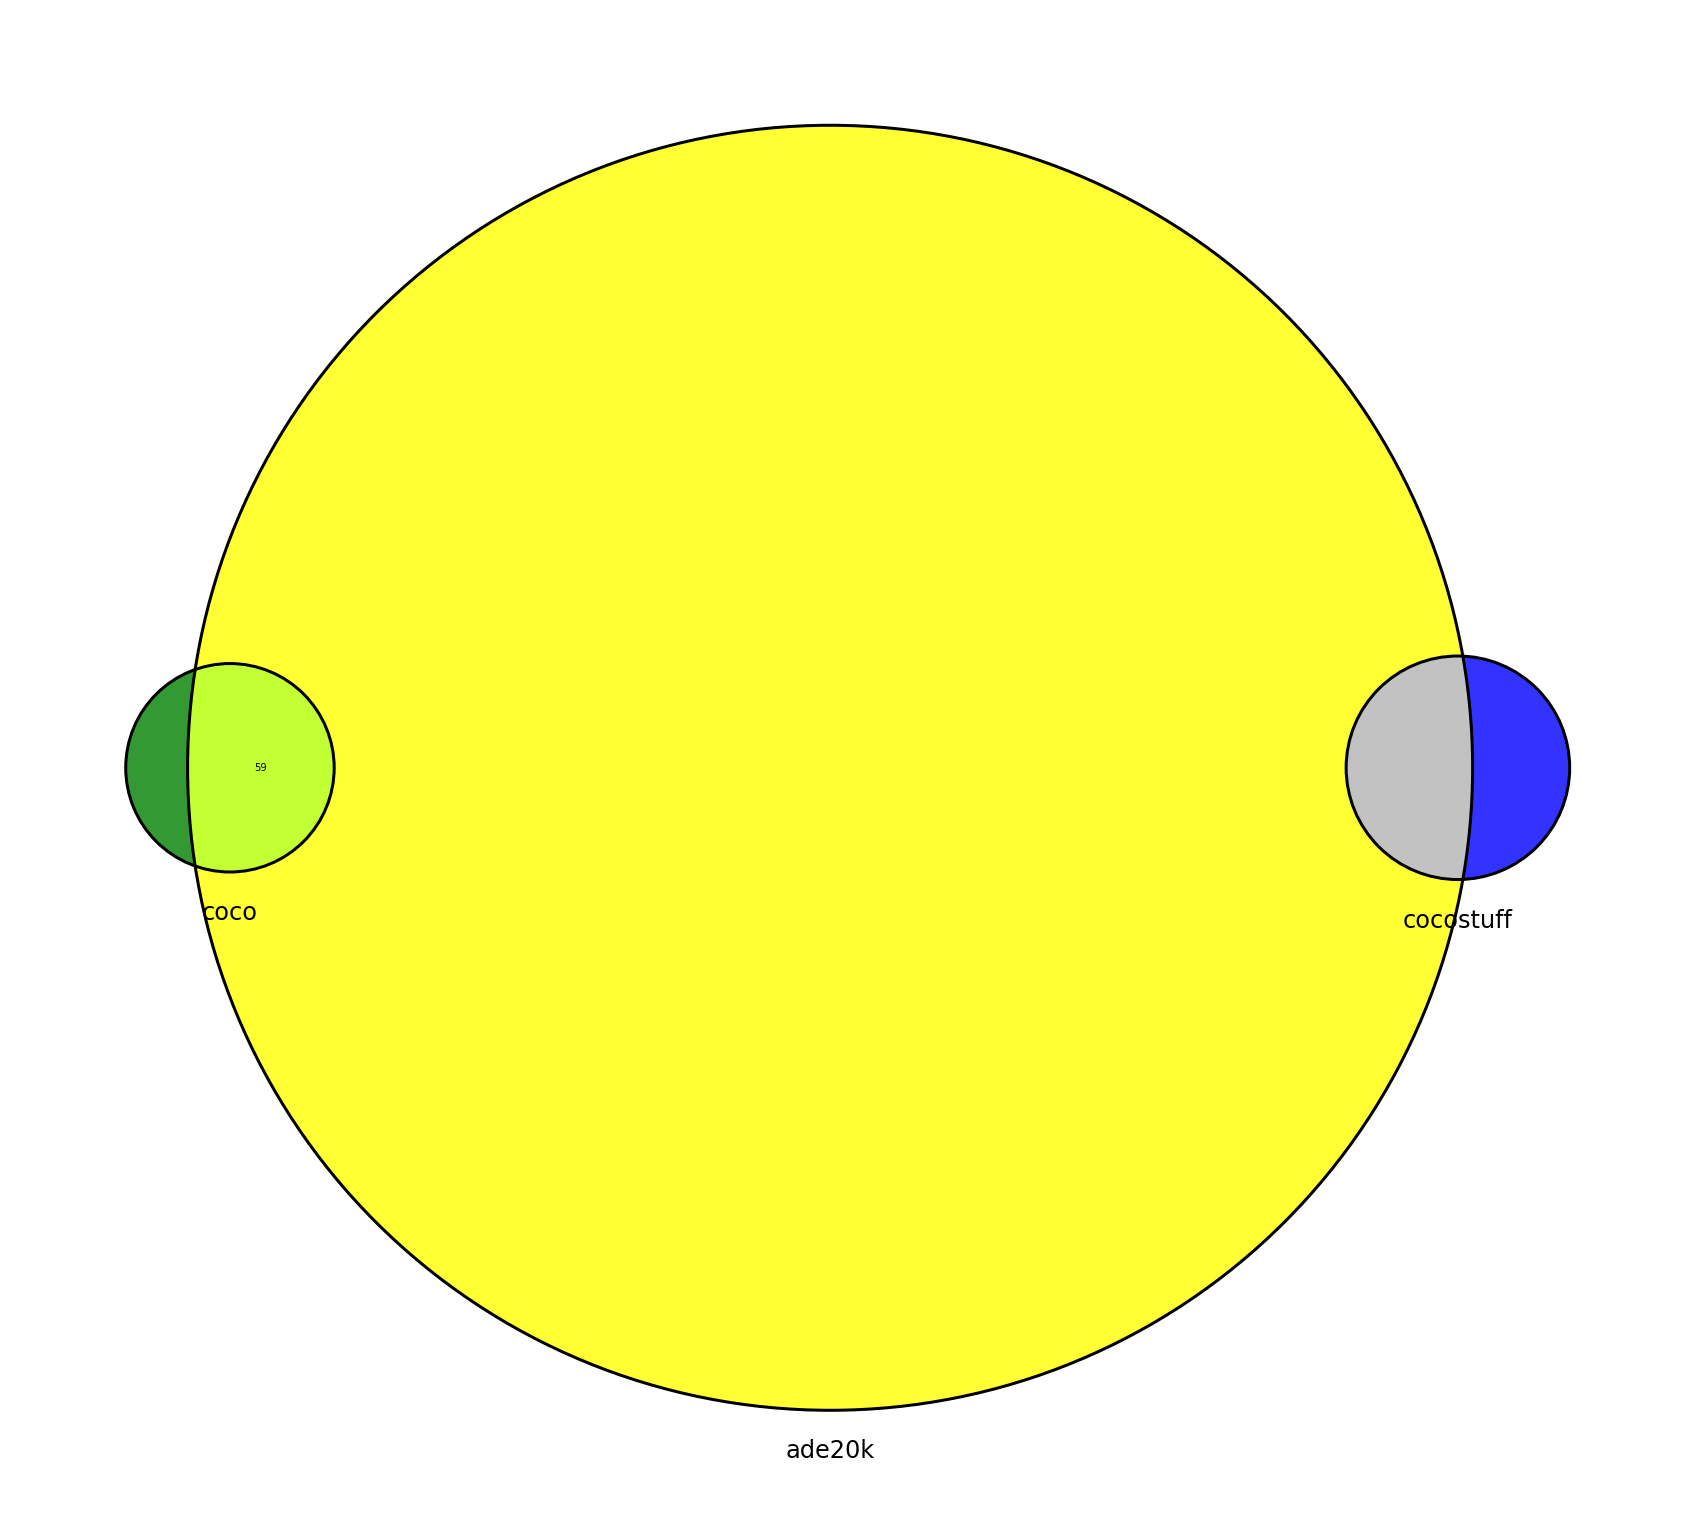

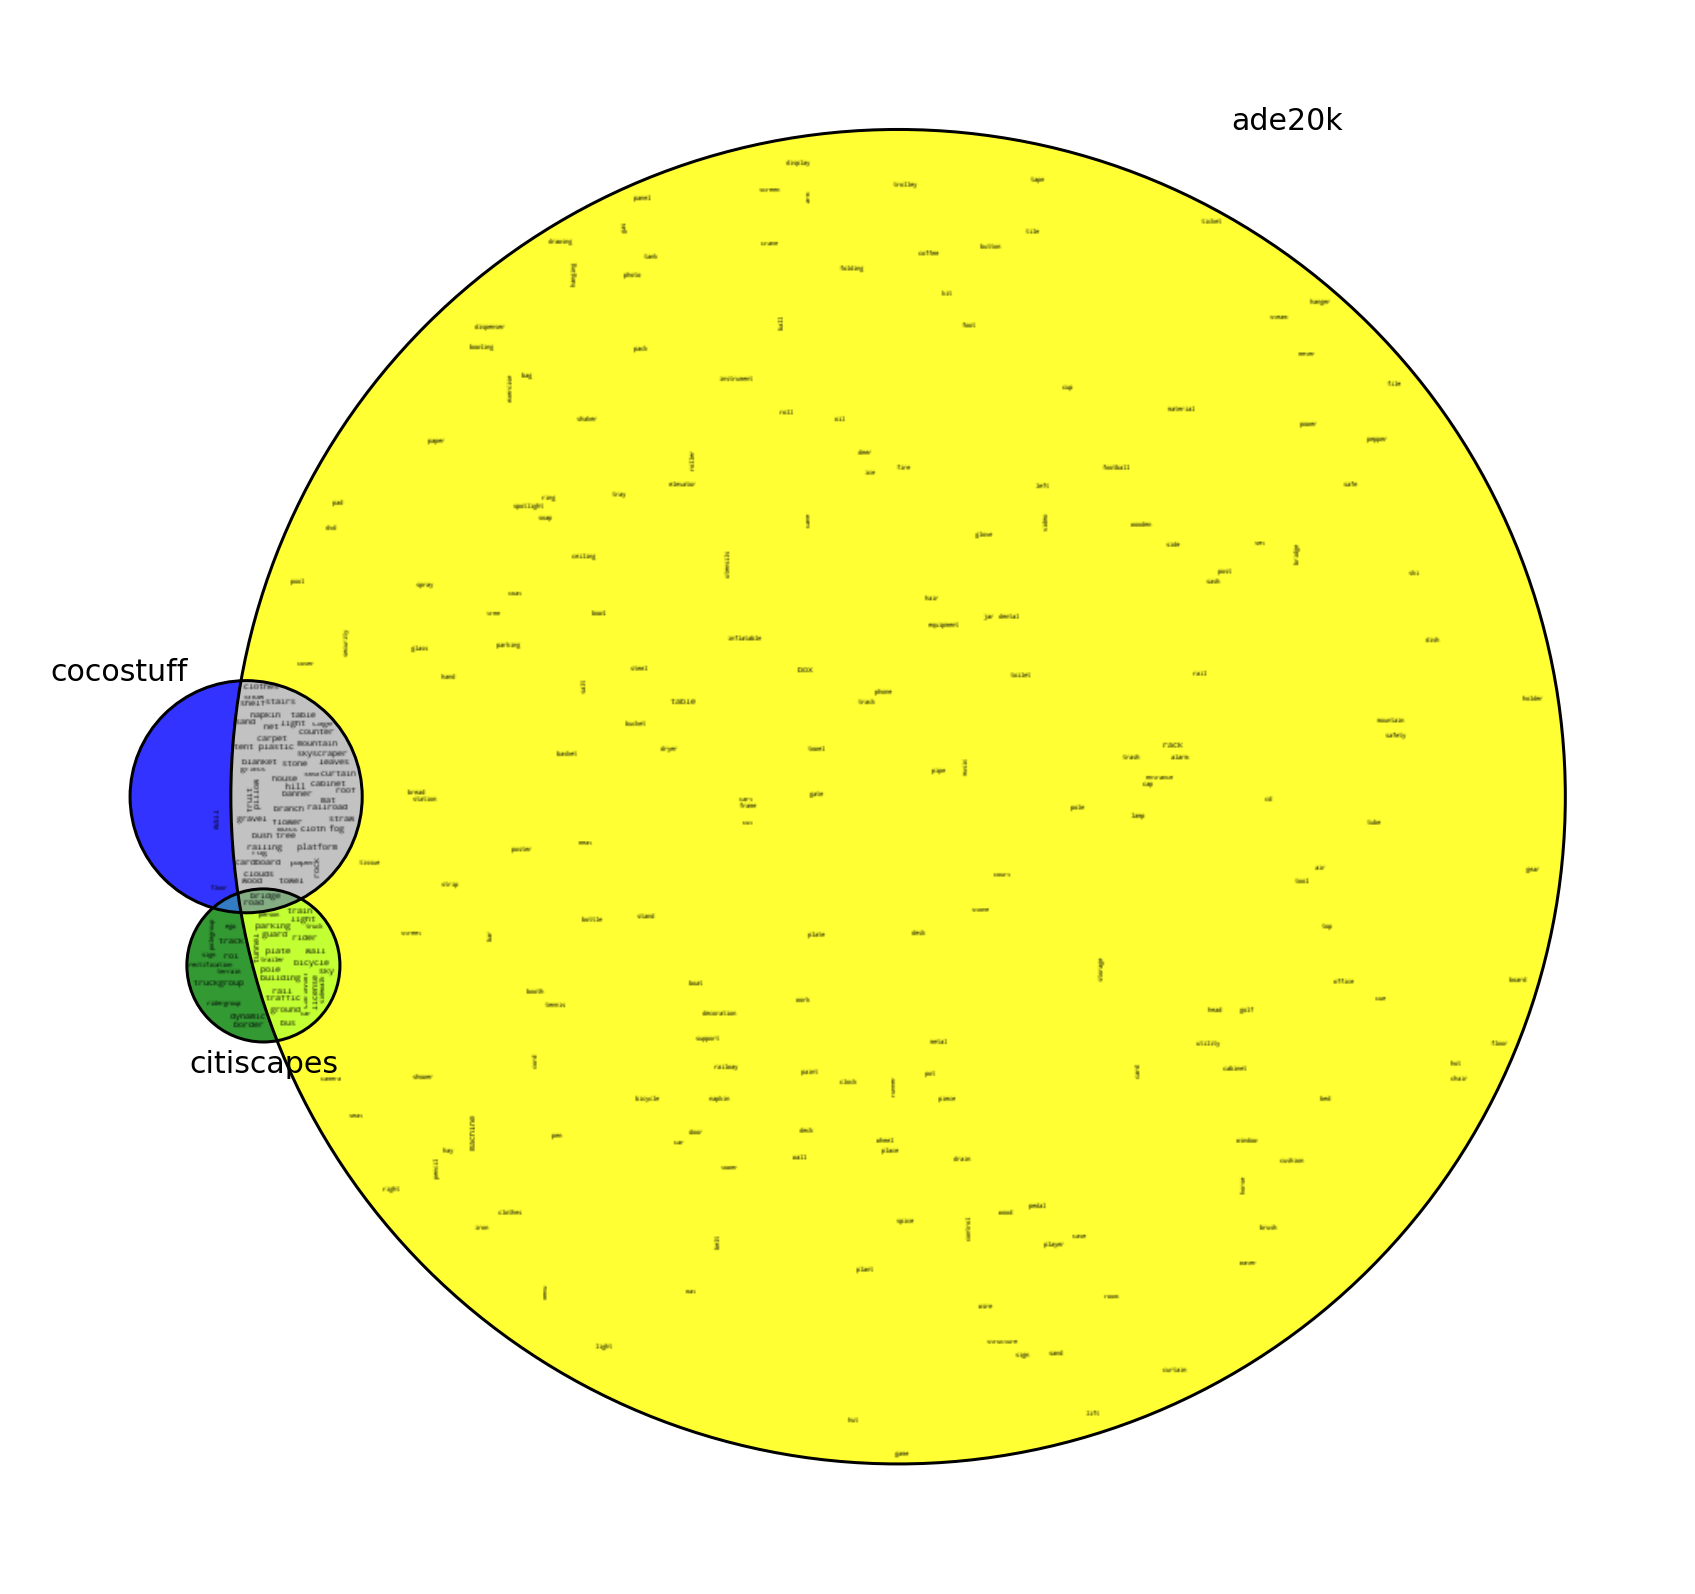

("Problem in rendering Word Venn's diagram", ('cocostuff', 'coco', 'citiscapes'))
("Problem in rendering Word Venn's diagram", ('voc_contex', 'voc', 'ade20k'))
("Problem in rendering Word Venn's diagram", ('voc_contex', 'voc', 'coco'))
("Problem in rendering Word Venn's diagram", ('voc_contex', 'voc', 'citiscapes'))


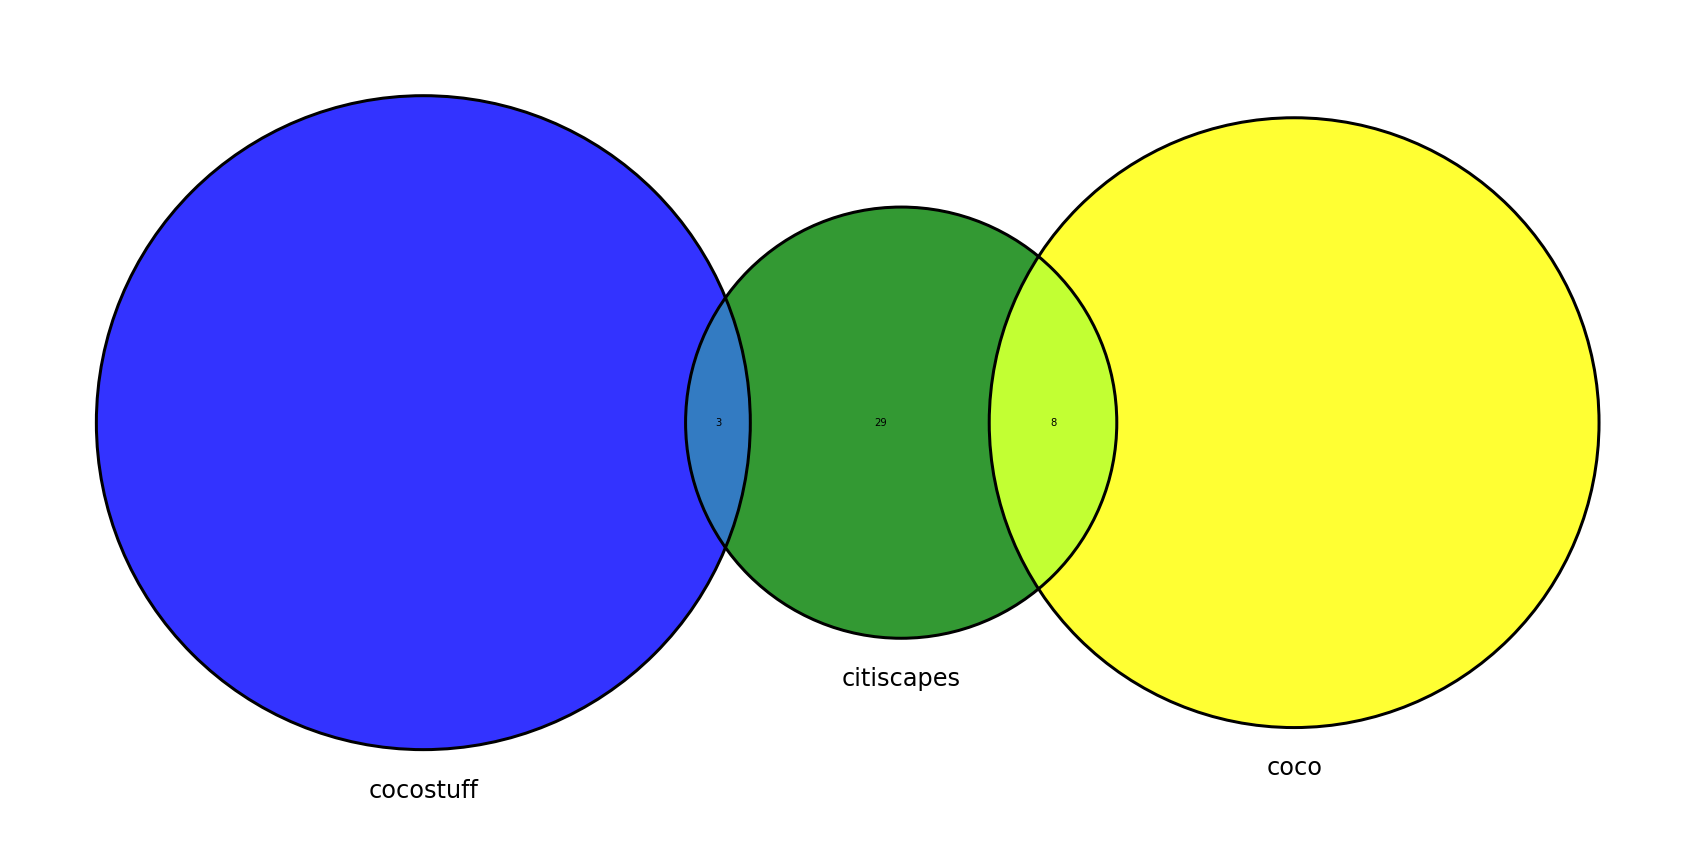

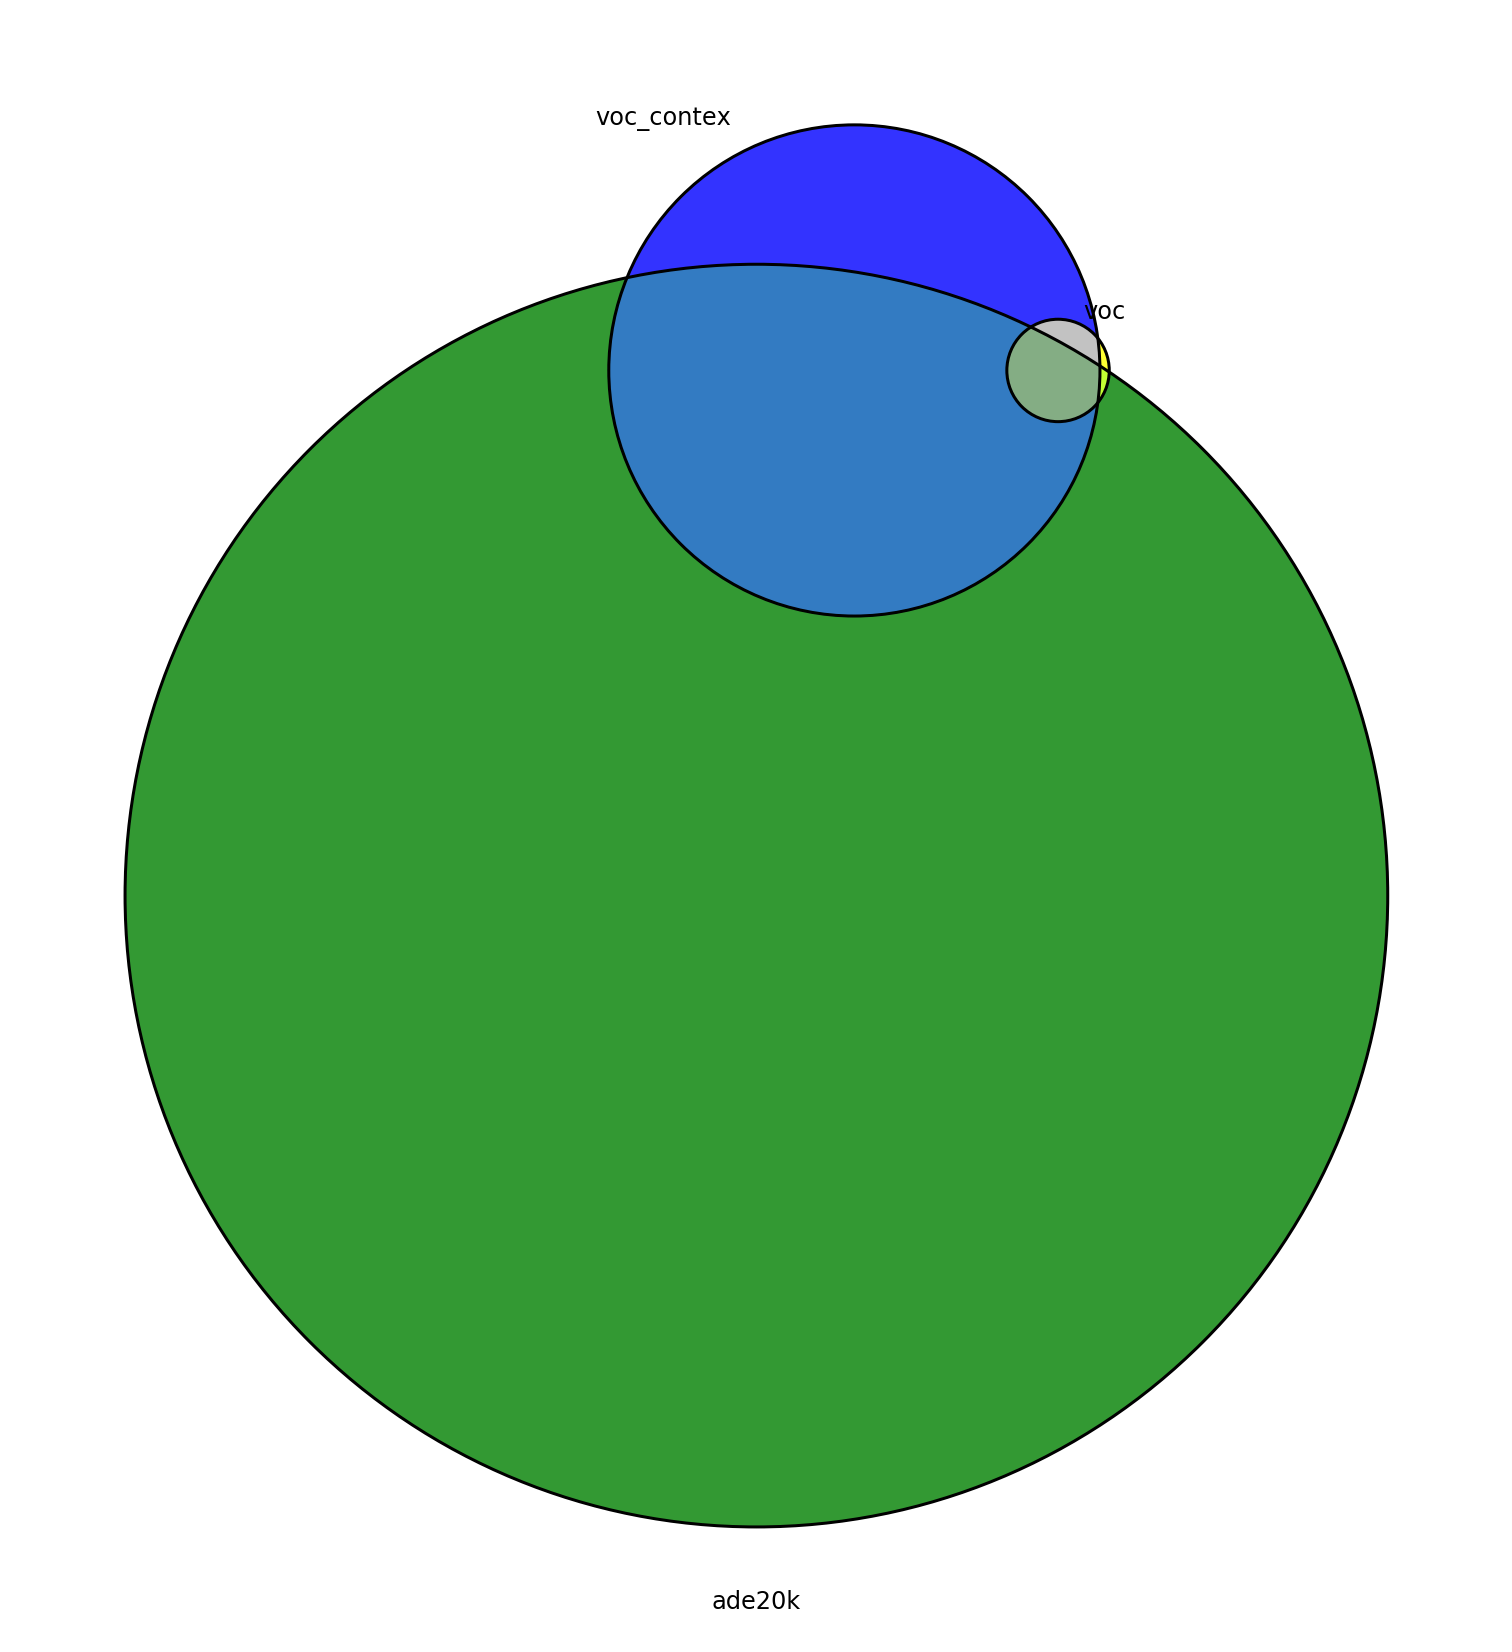

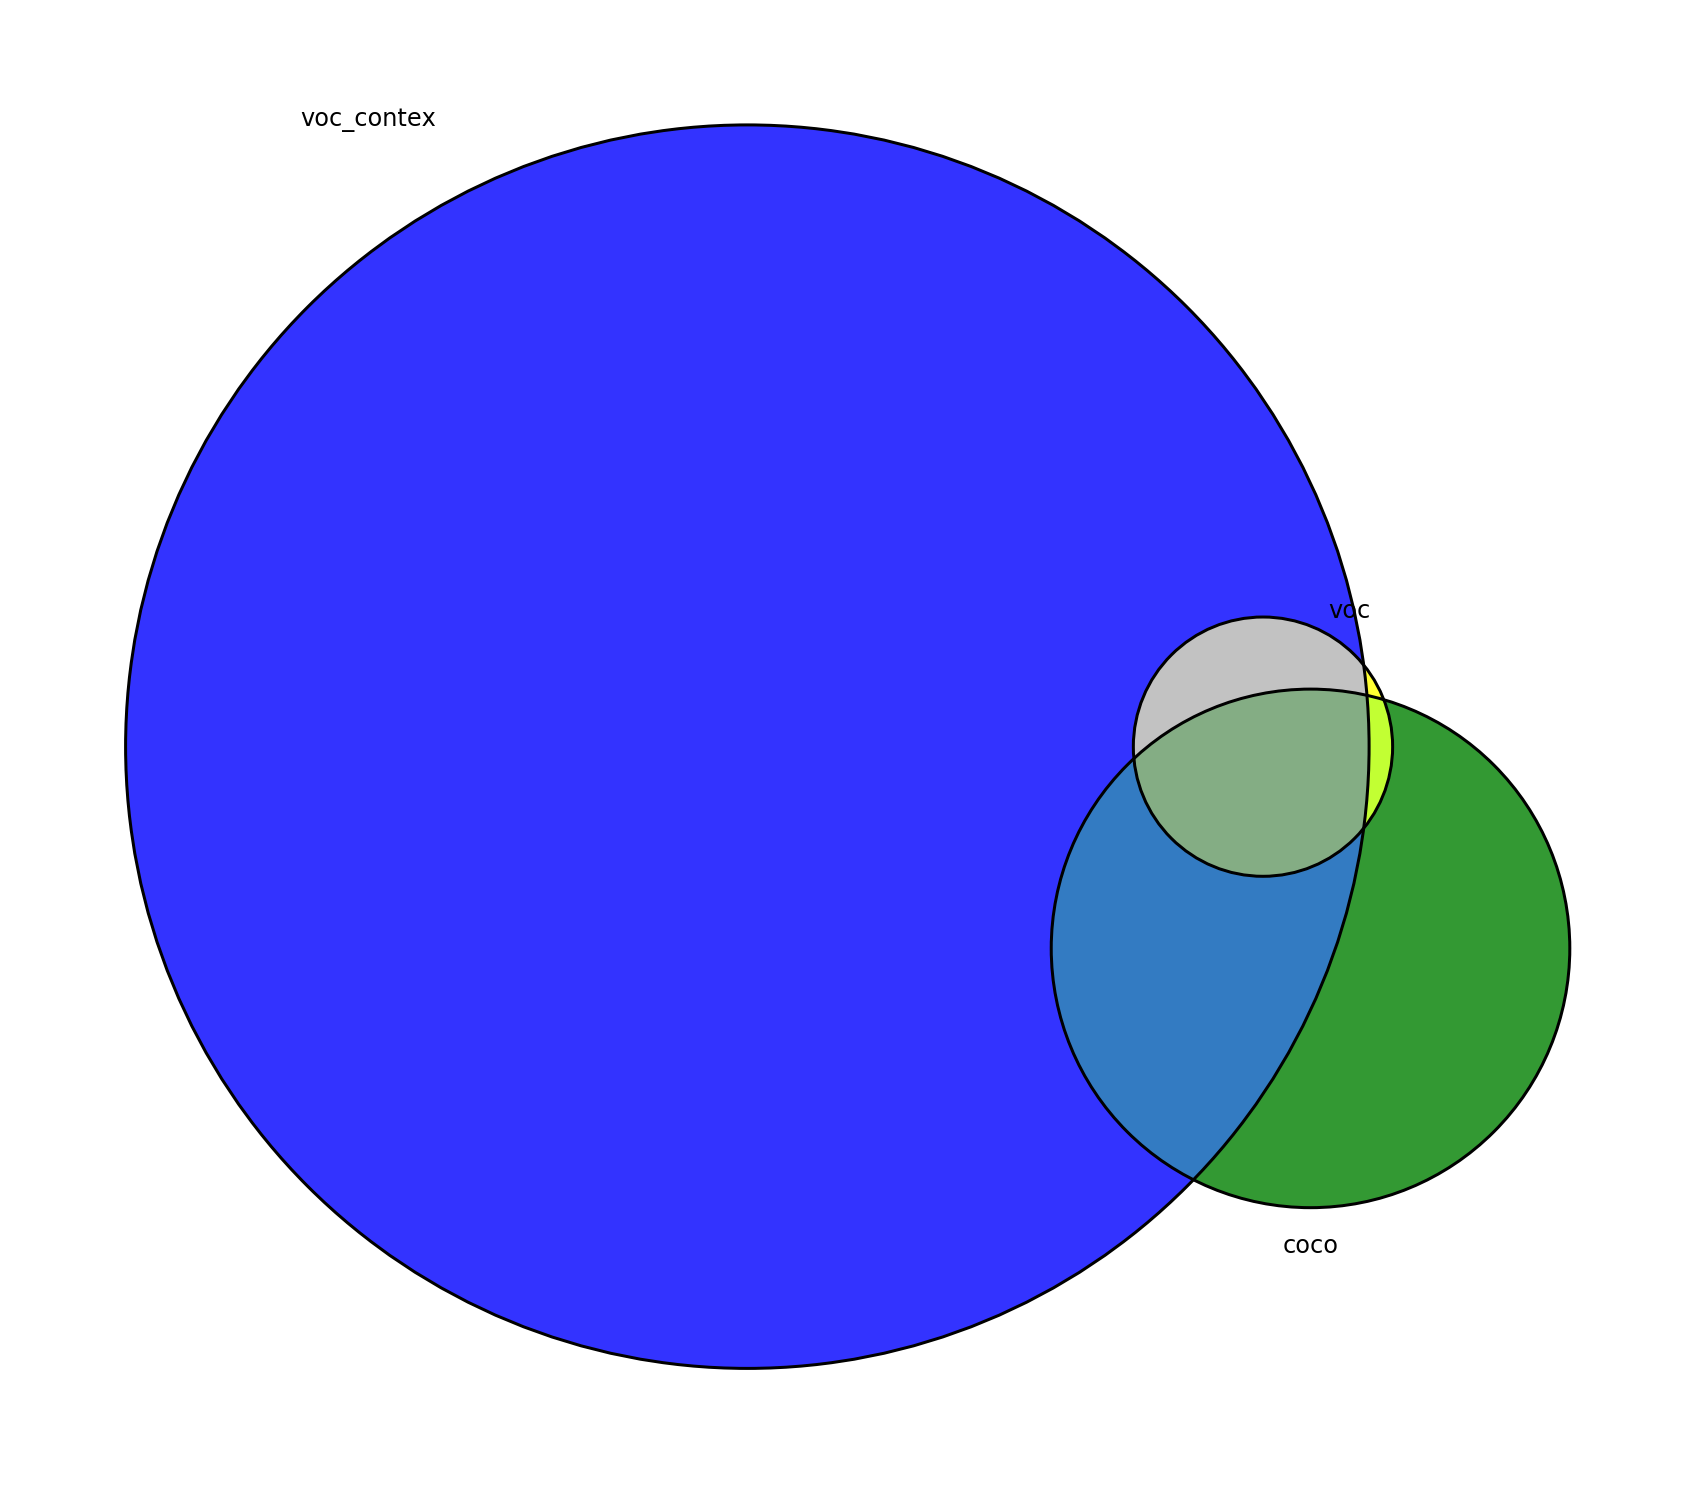

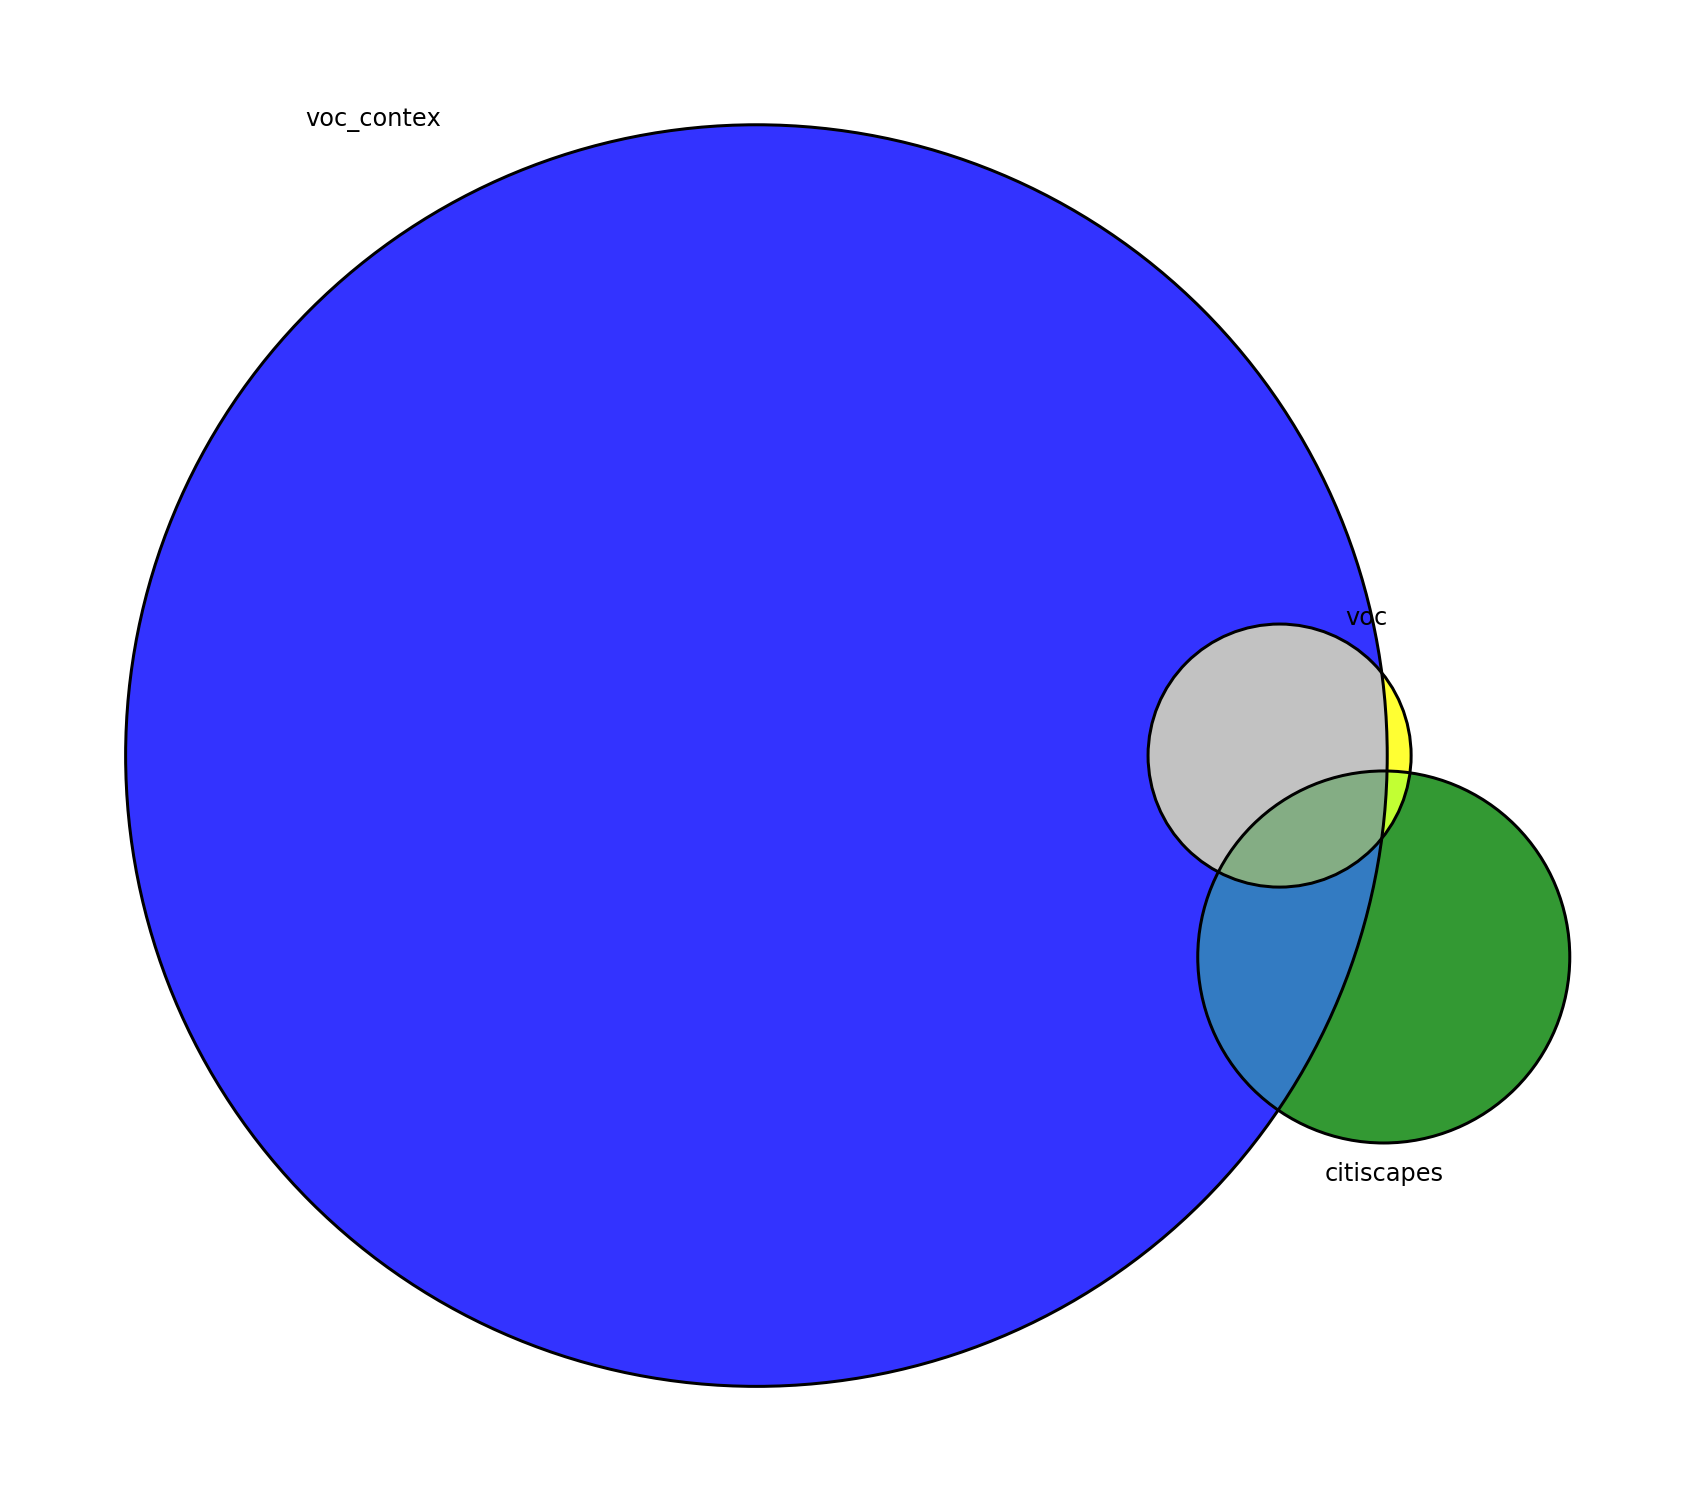

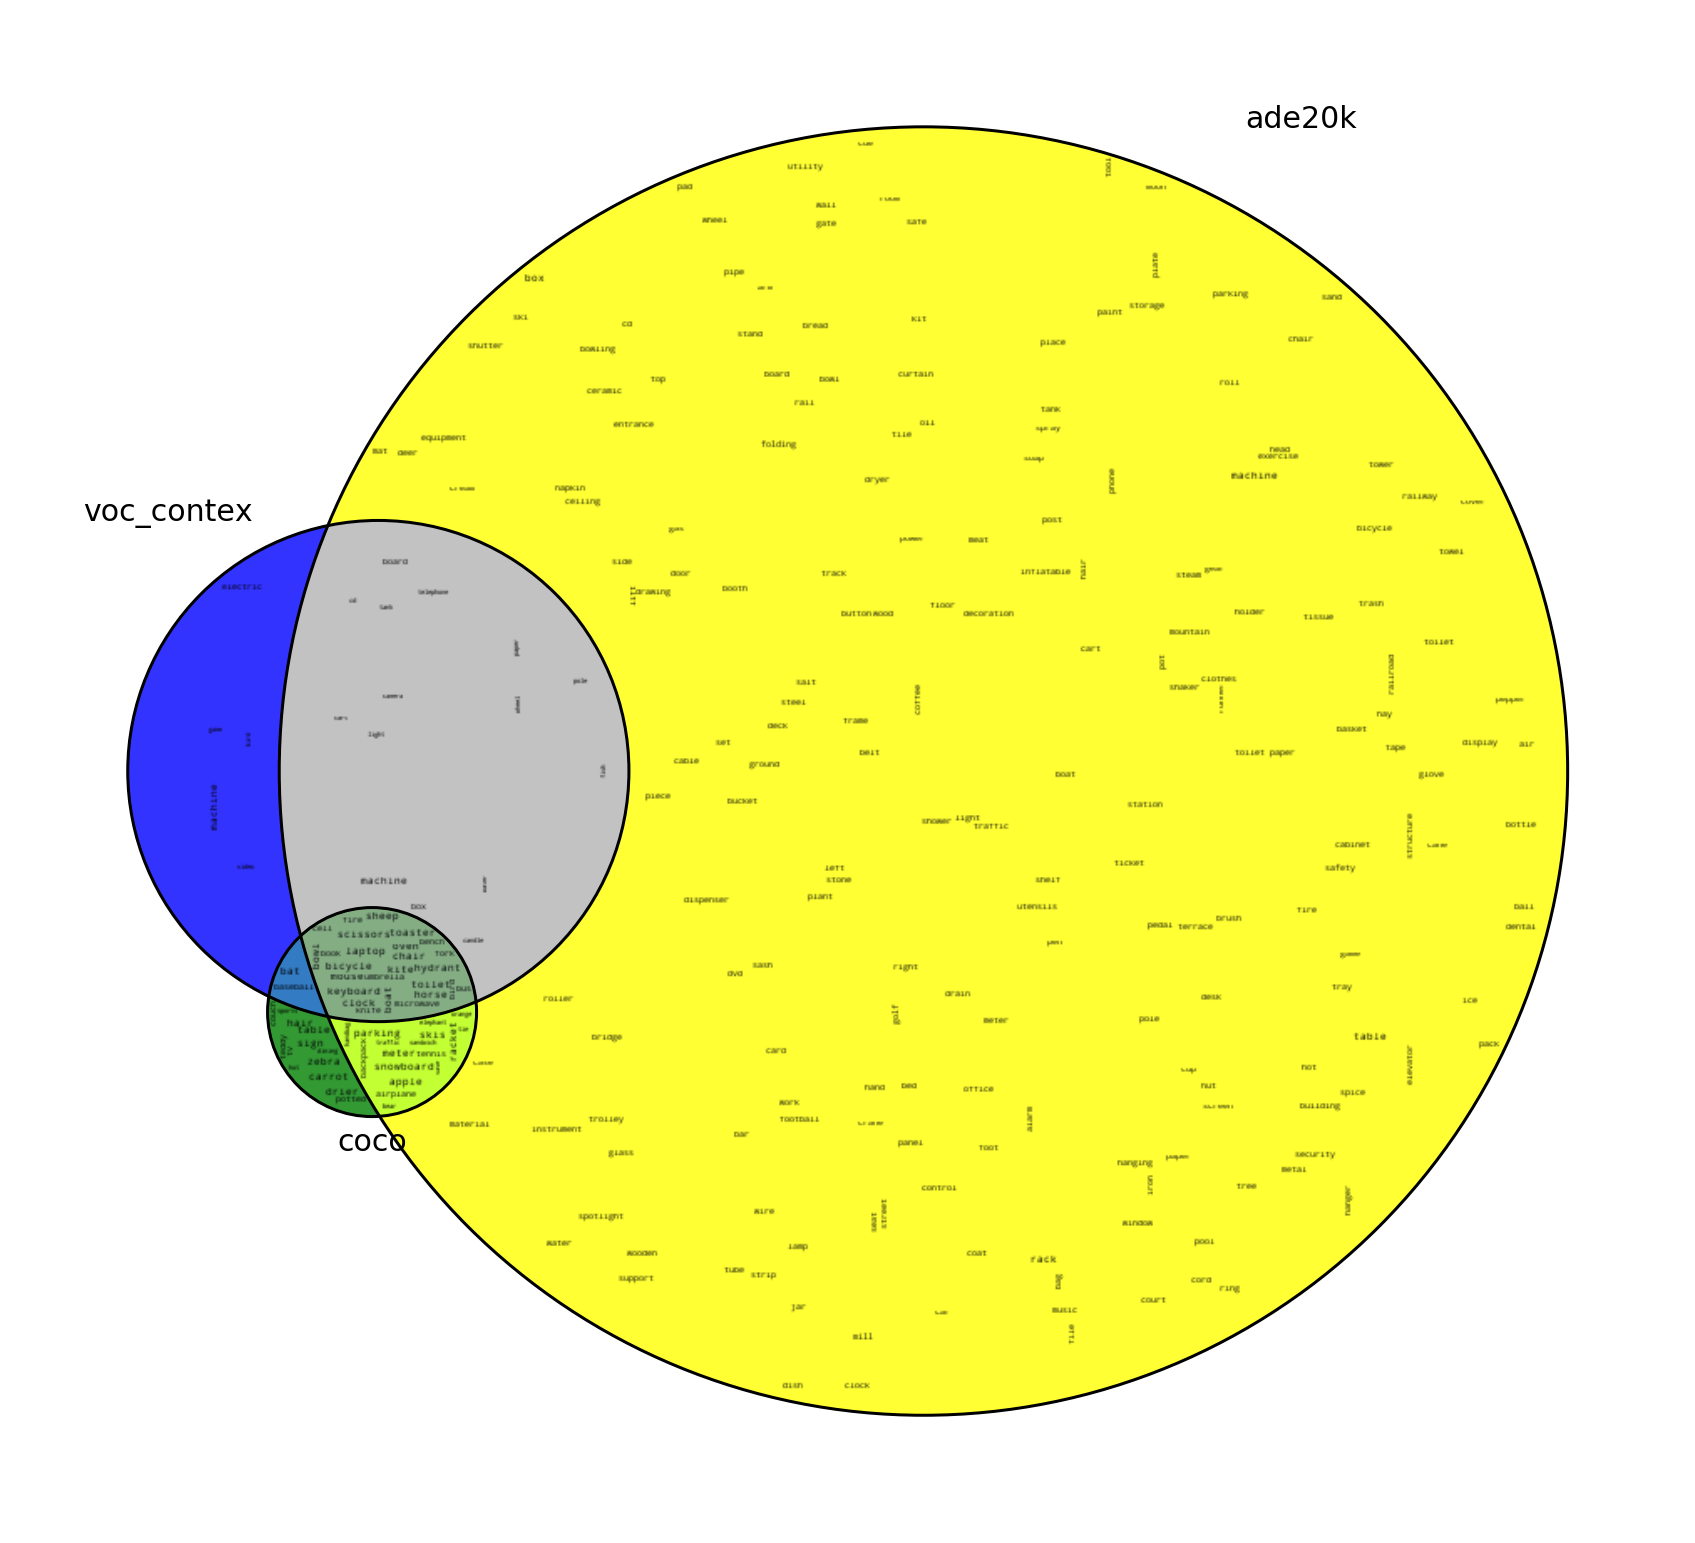

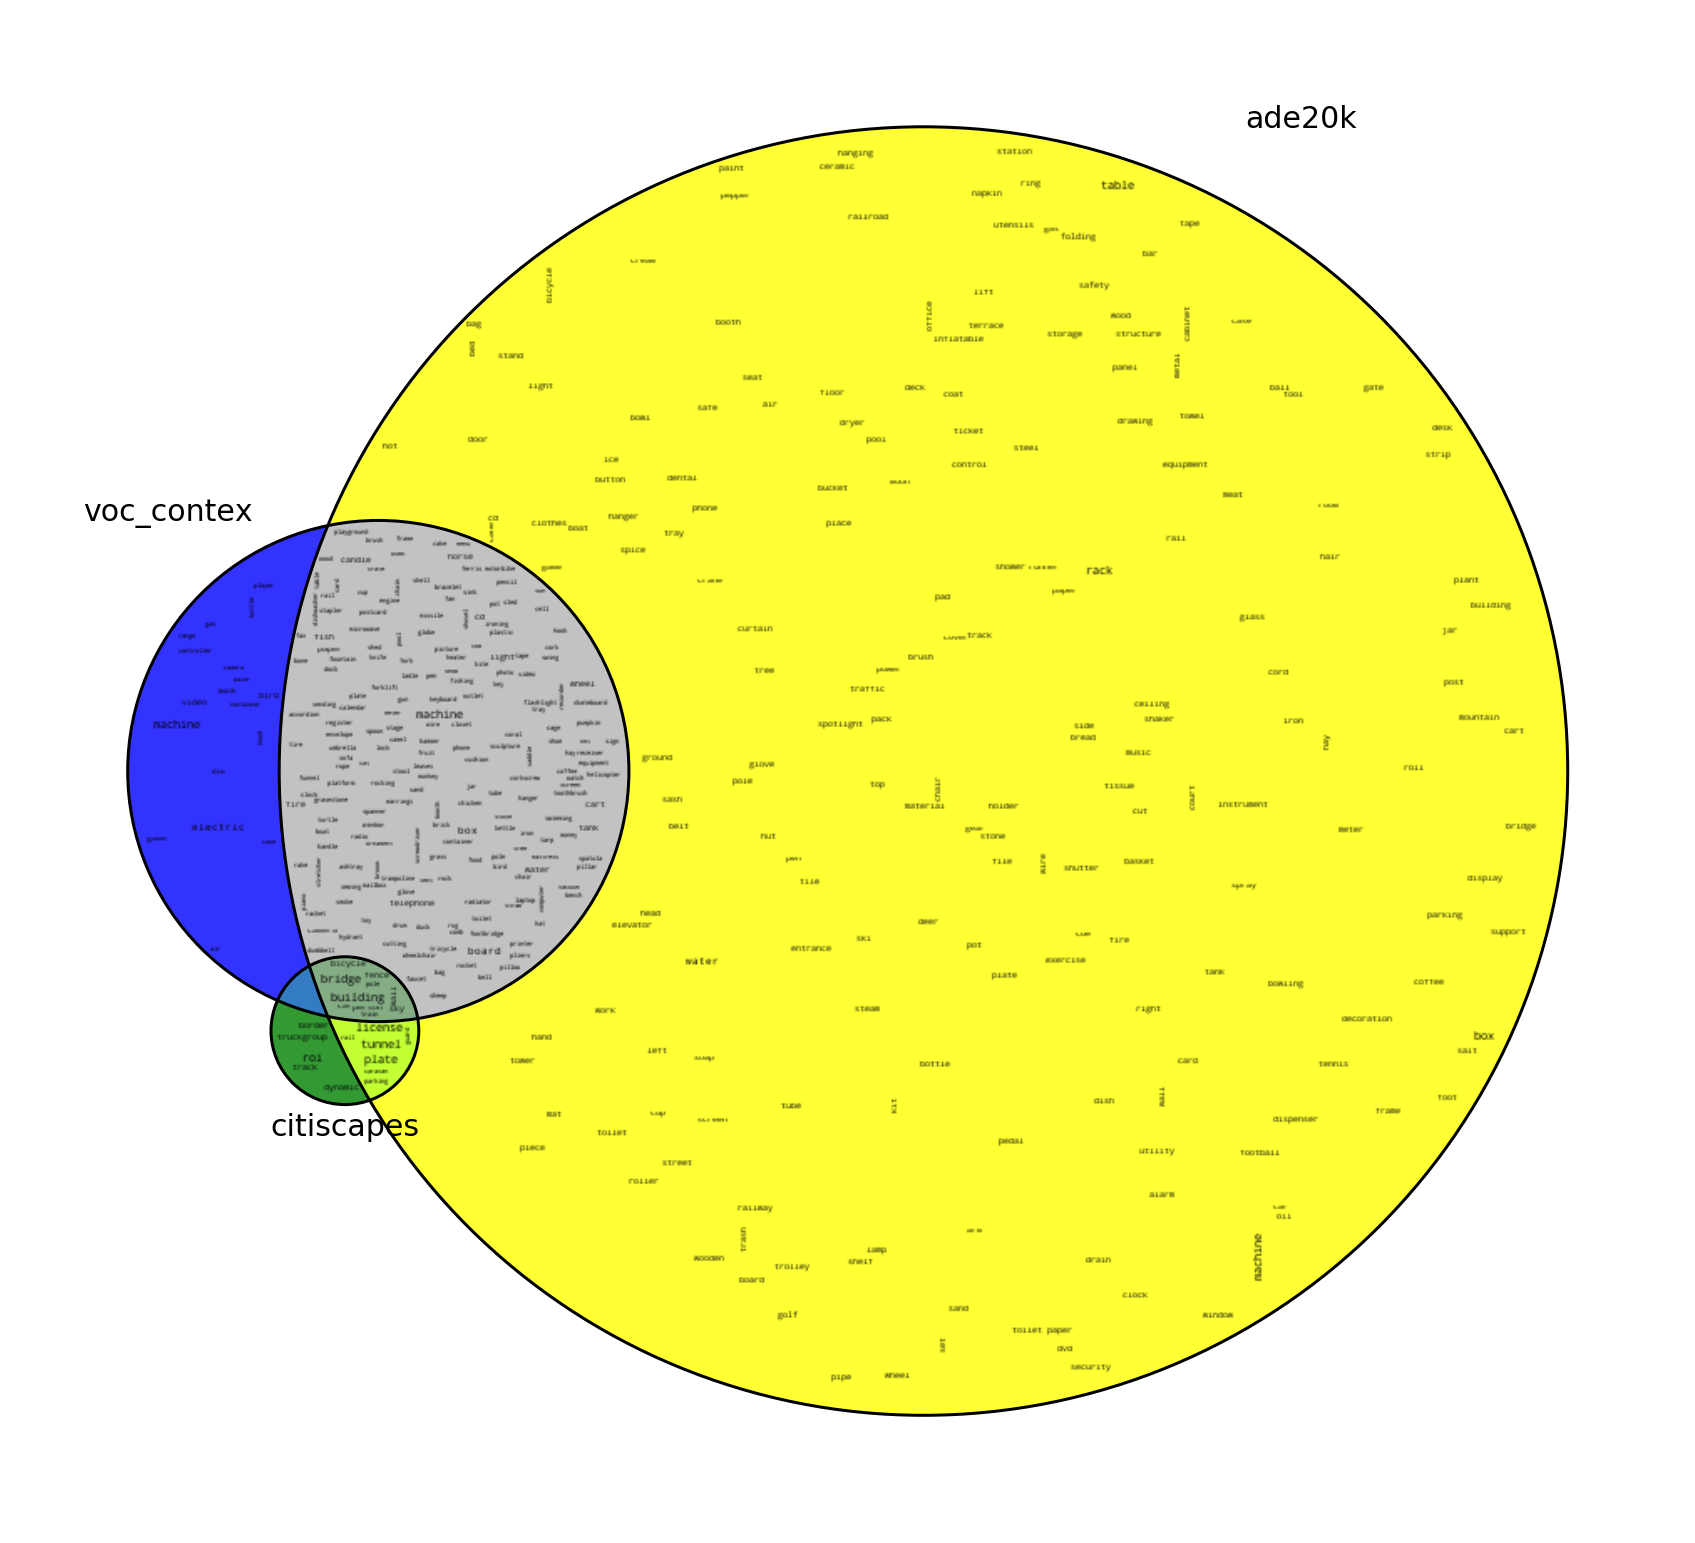

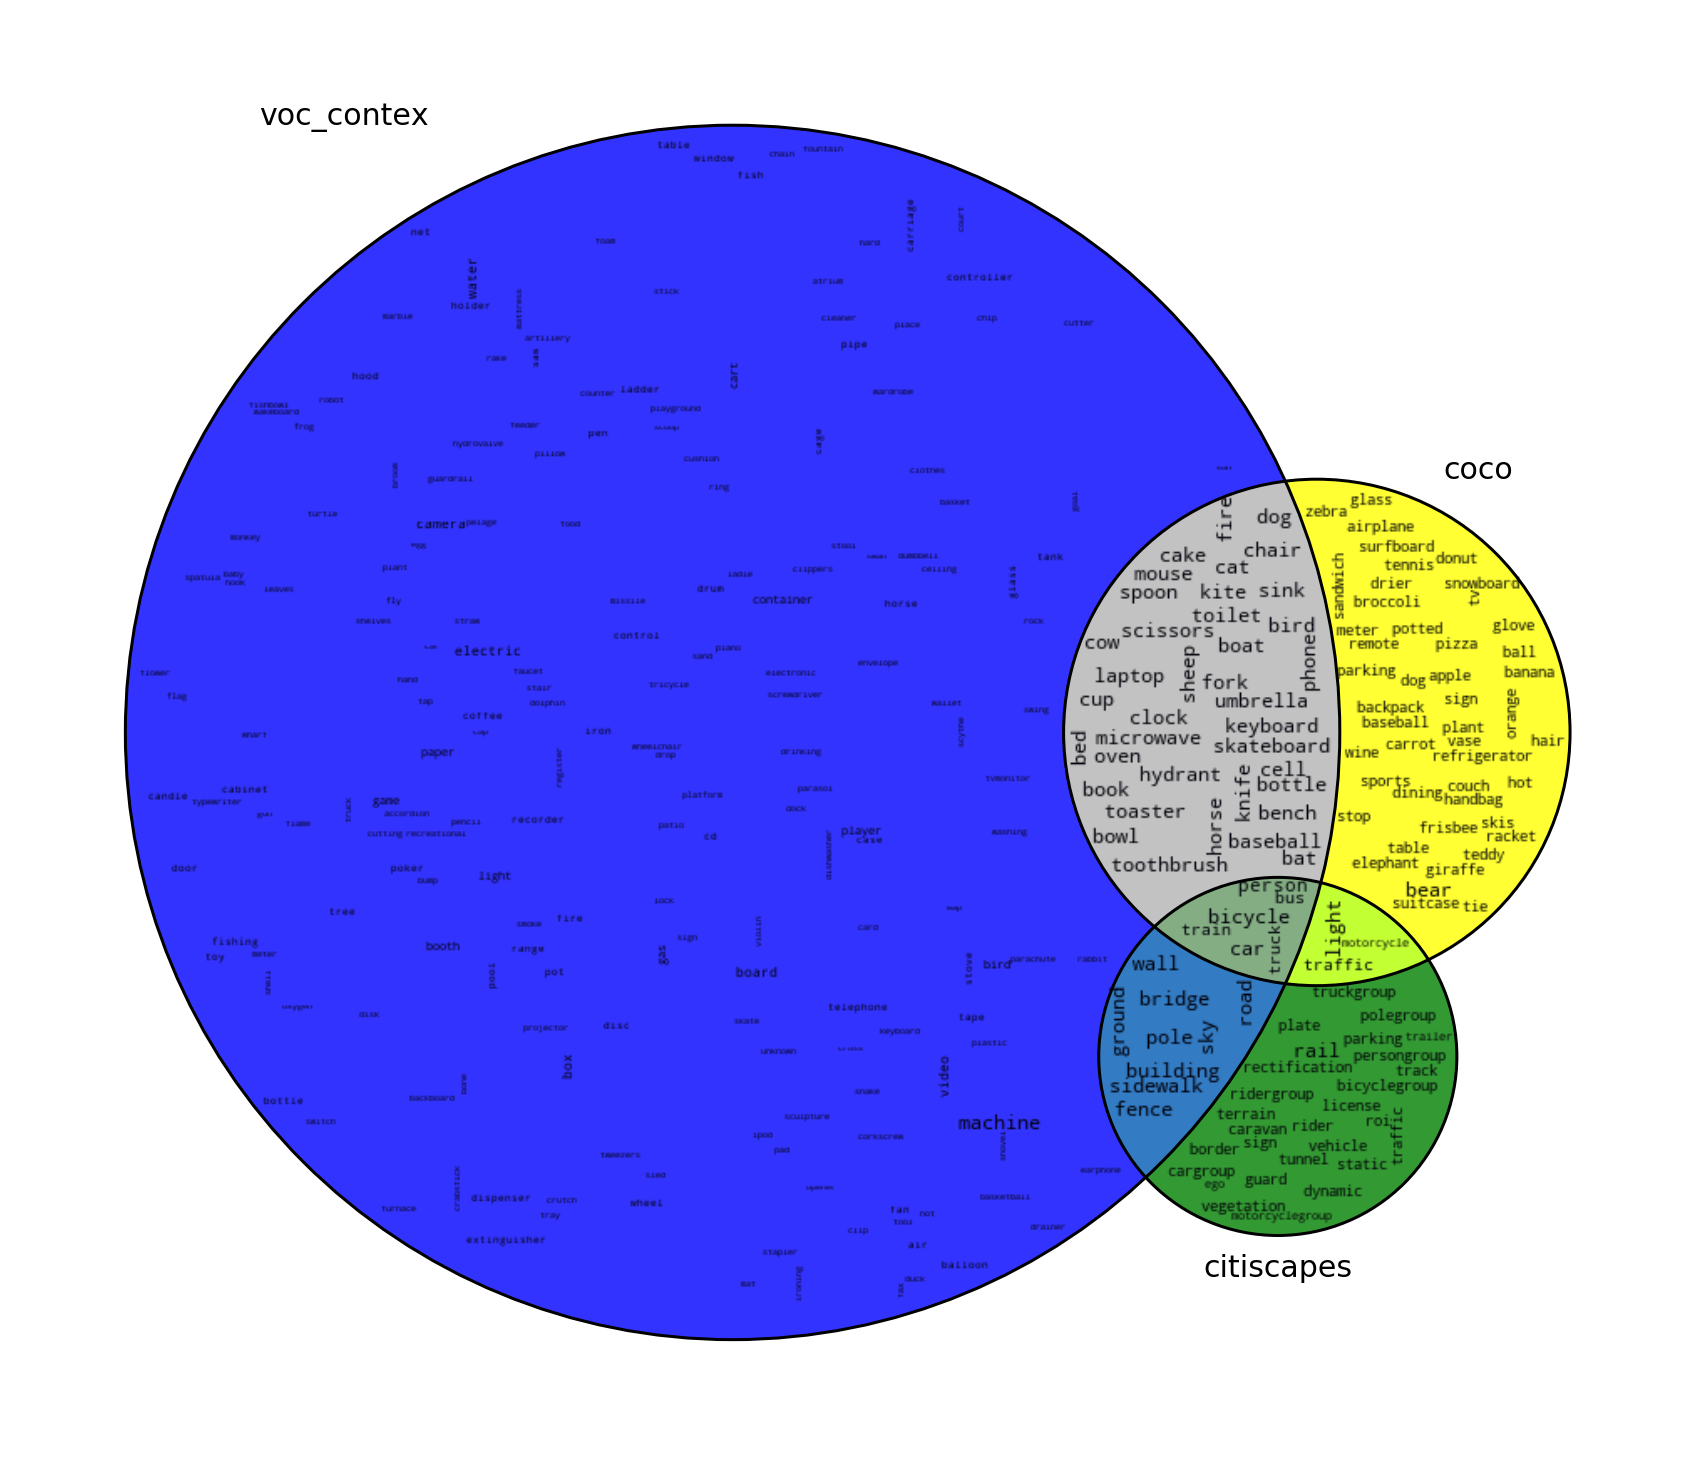

("Problem in rendering Word Venn's diagram", ('voc', 'ade20k', 'coco'))
("Problem in rendering Word Venn's diagram", ('voc', 'ade20k', 'citiscapes'))


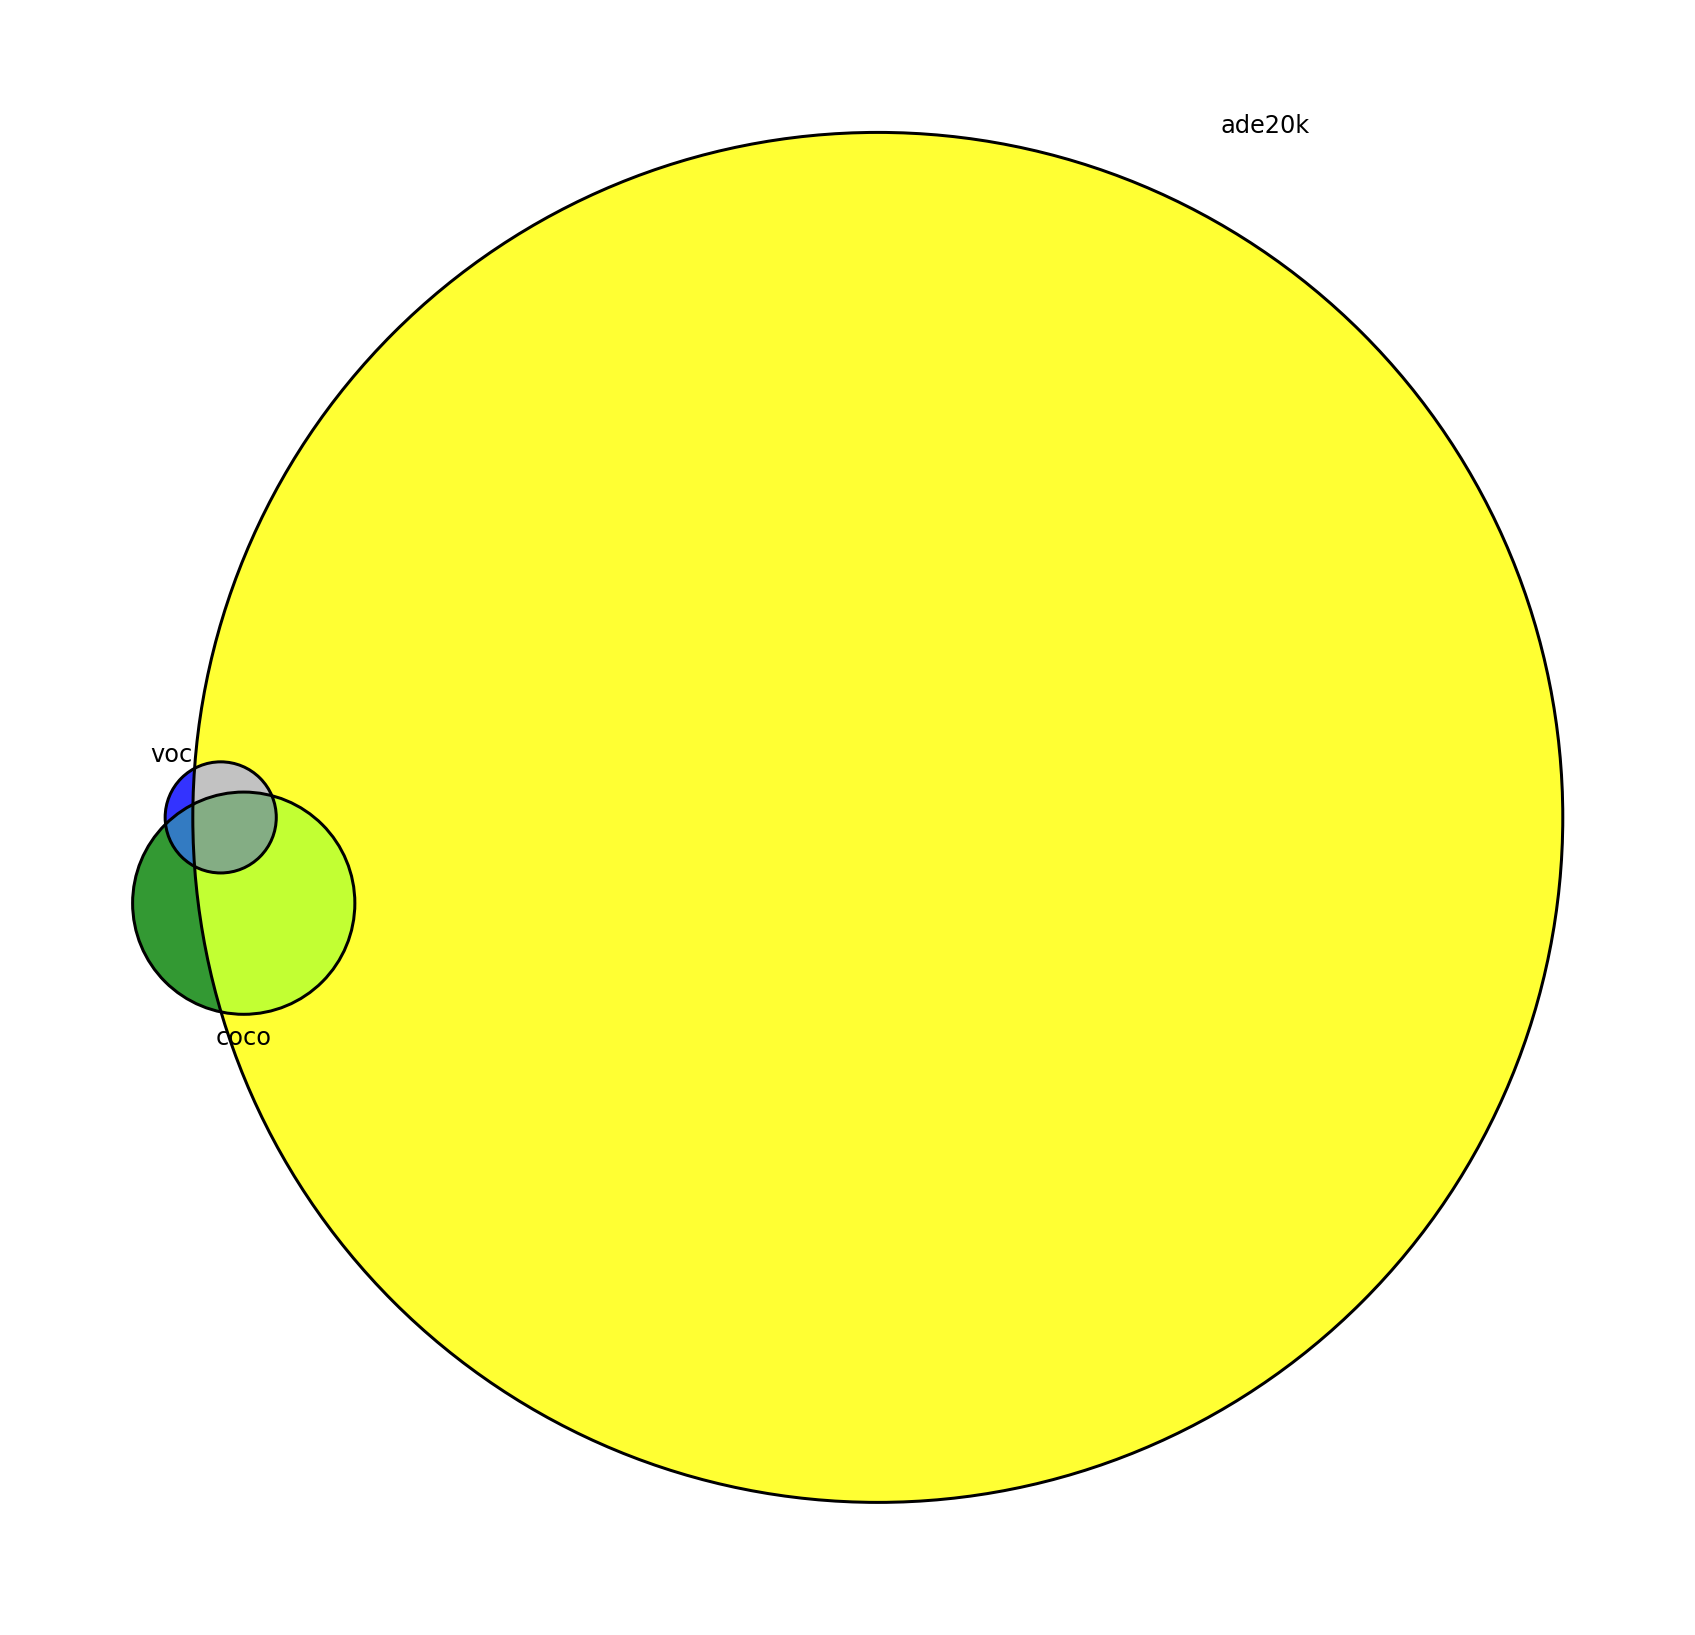

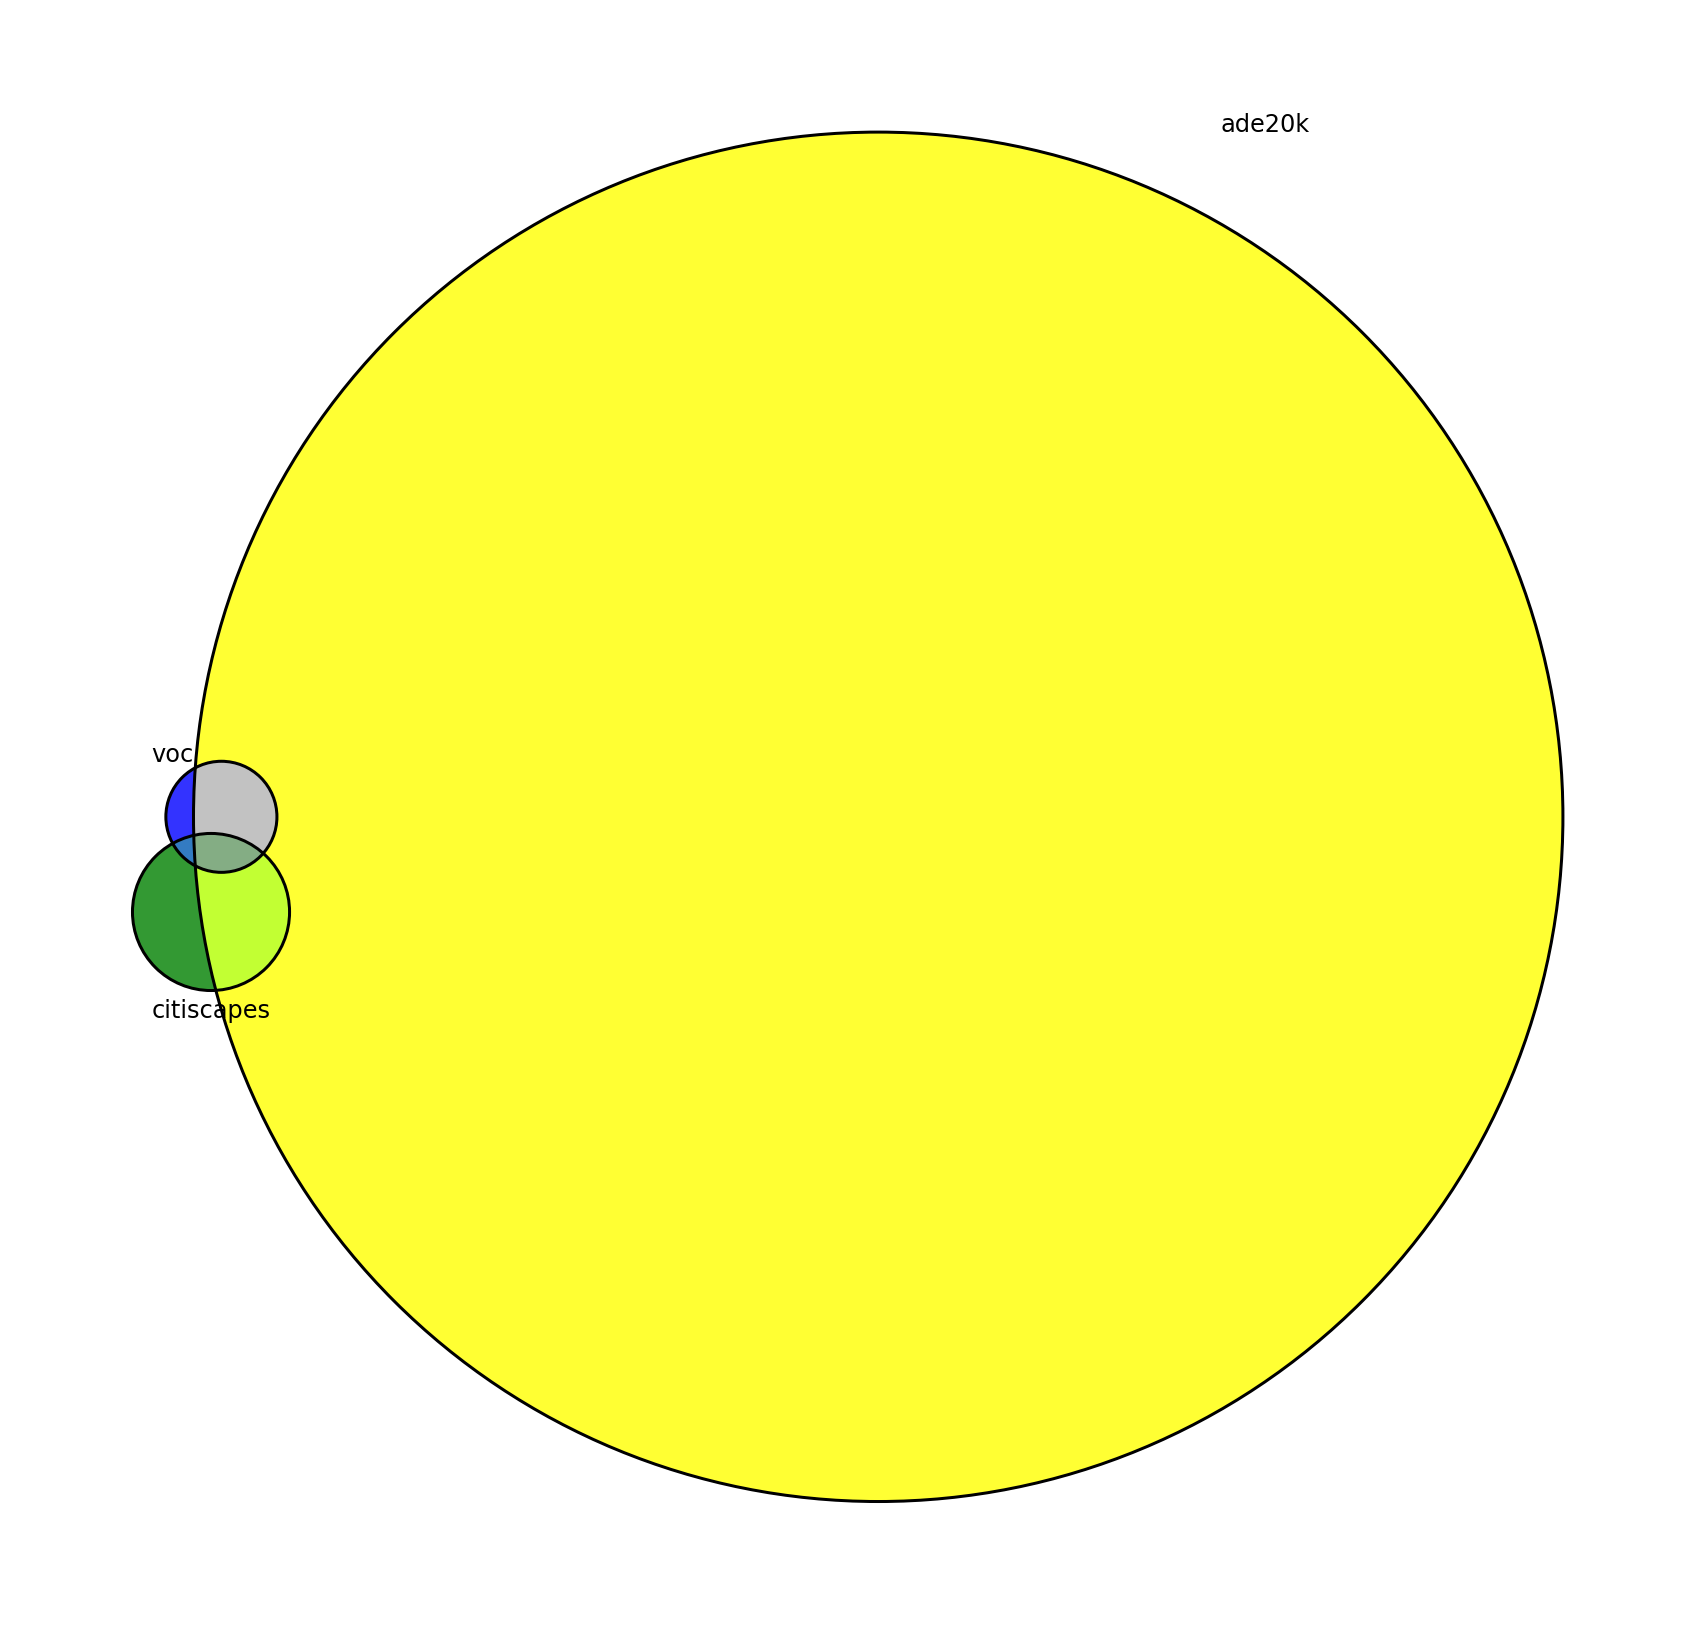

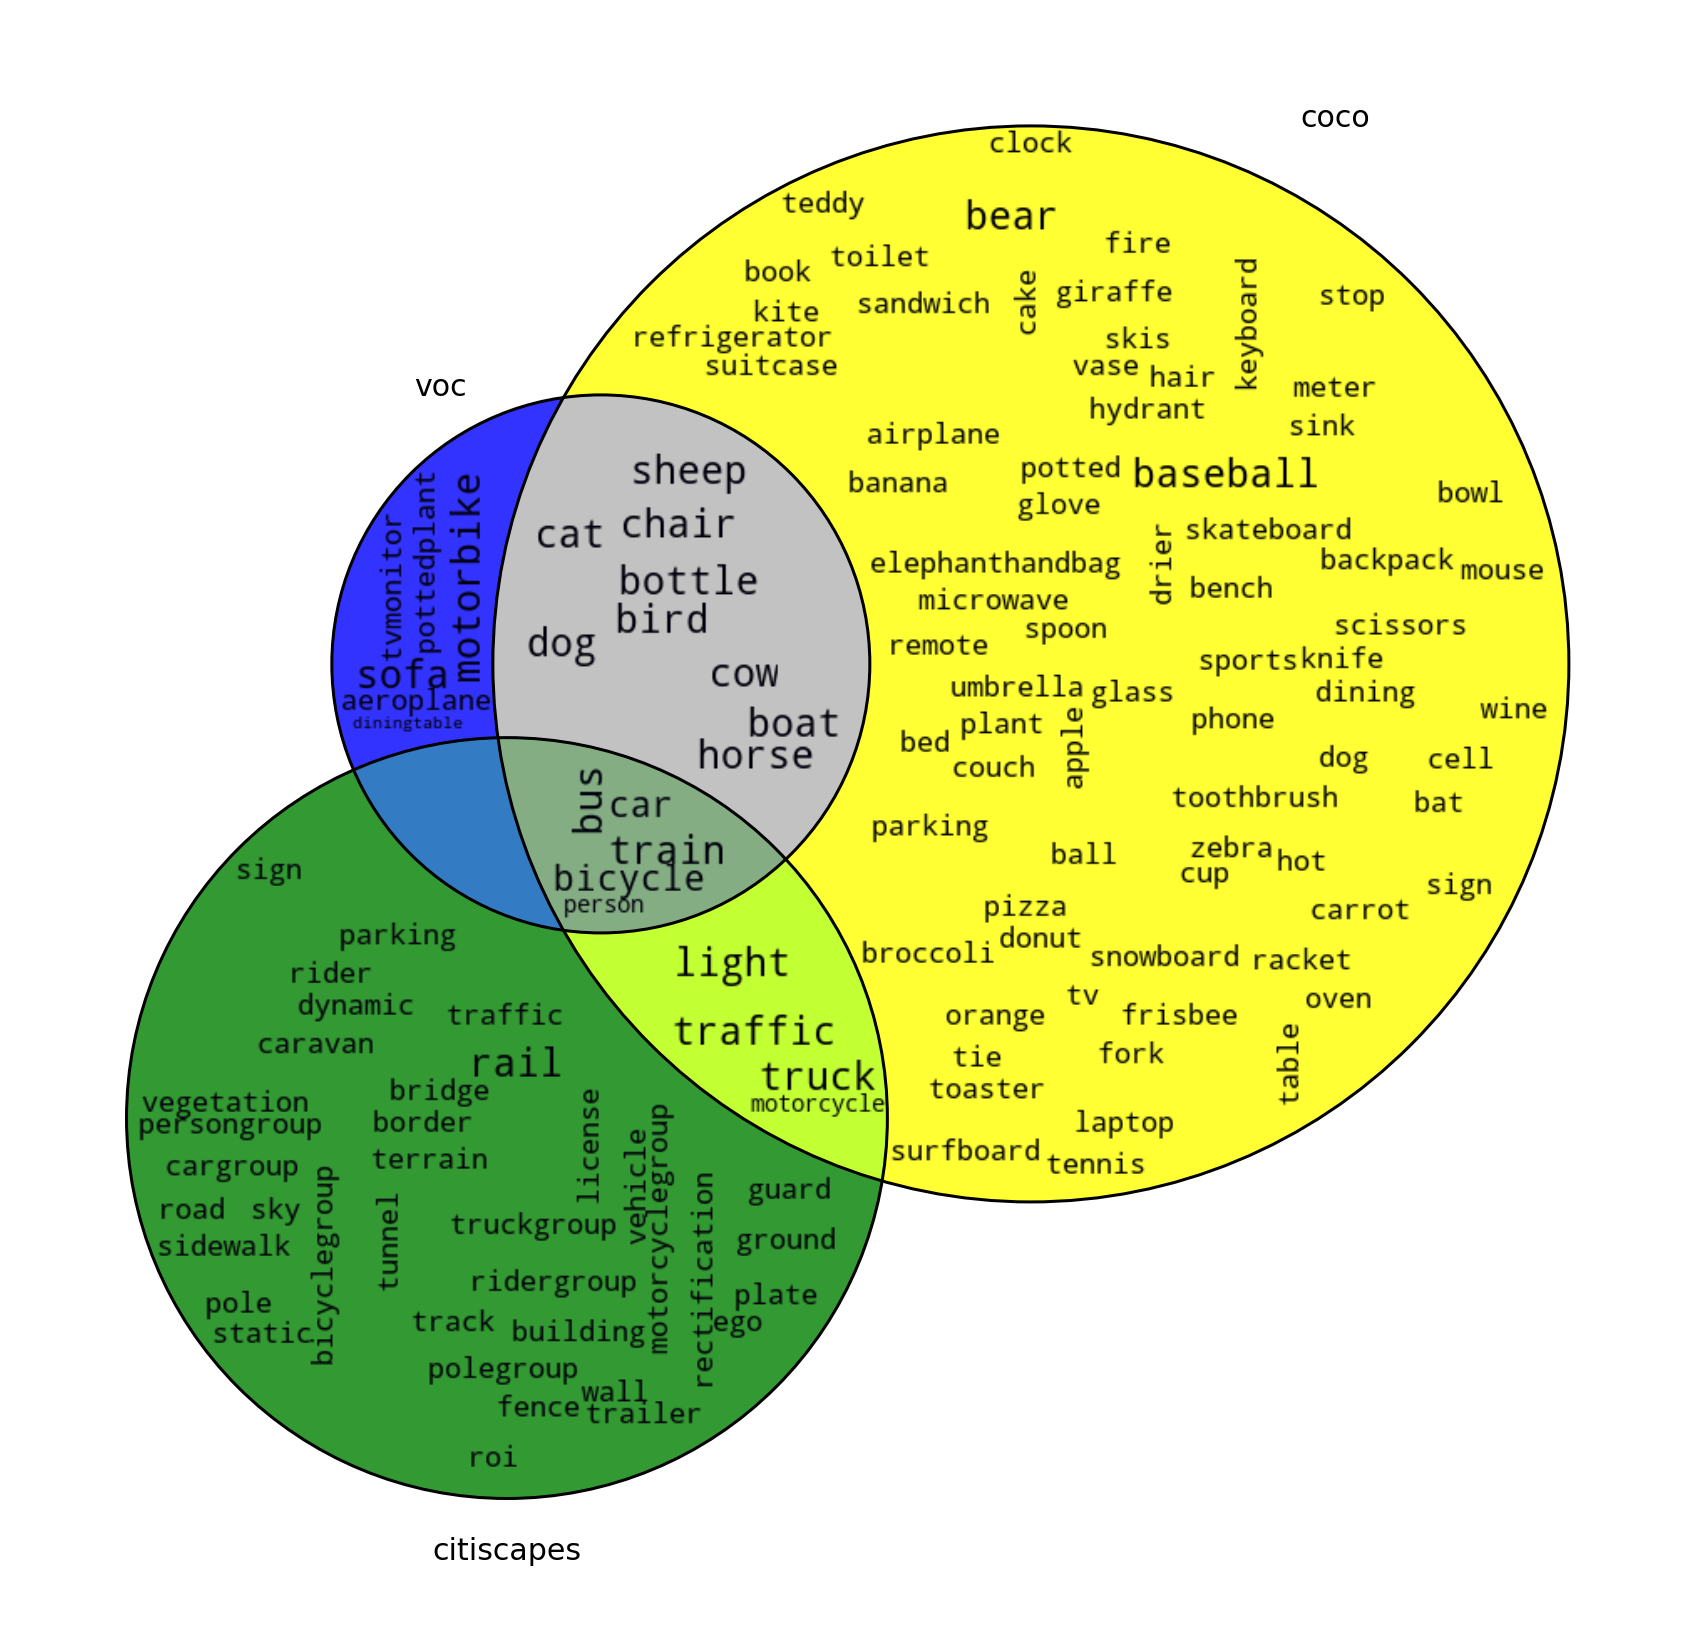

("Problem in rendering Word Venn's diagram", ('ade20k', 'coco', 'citiscapes'))


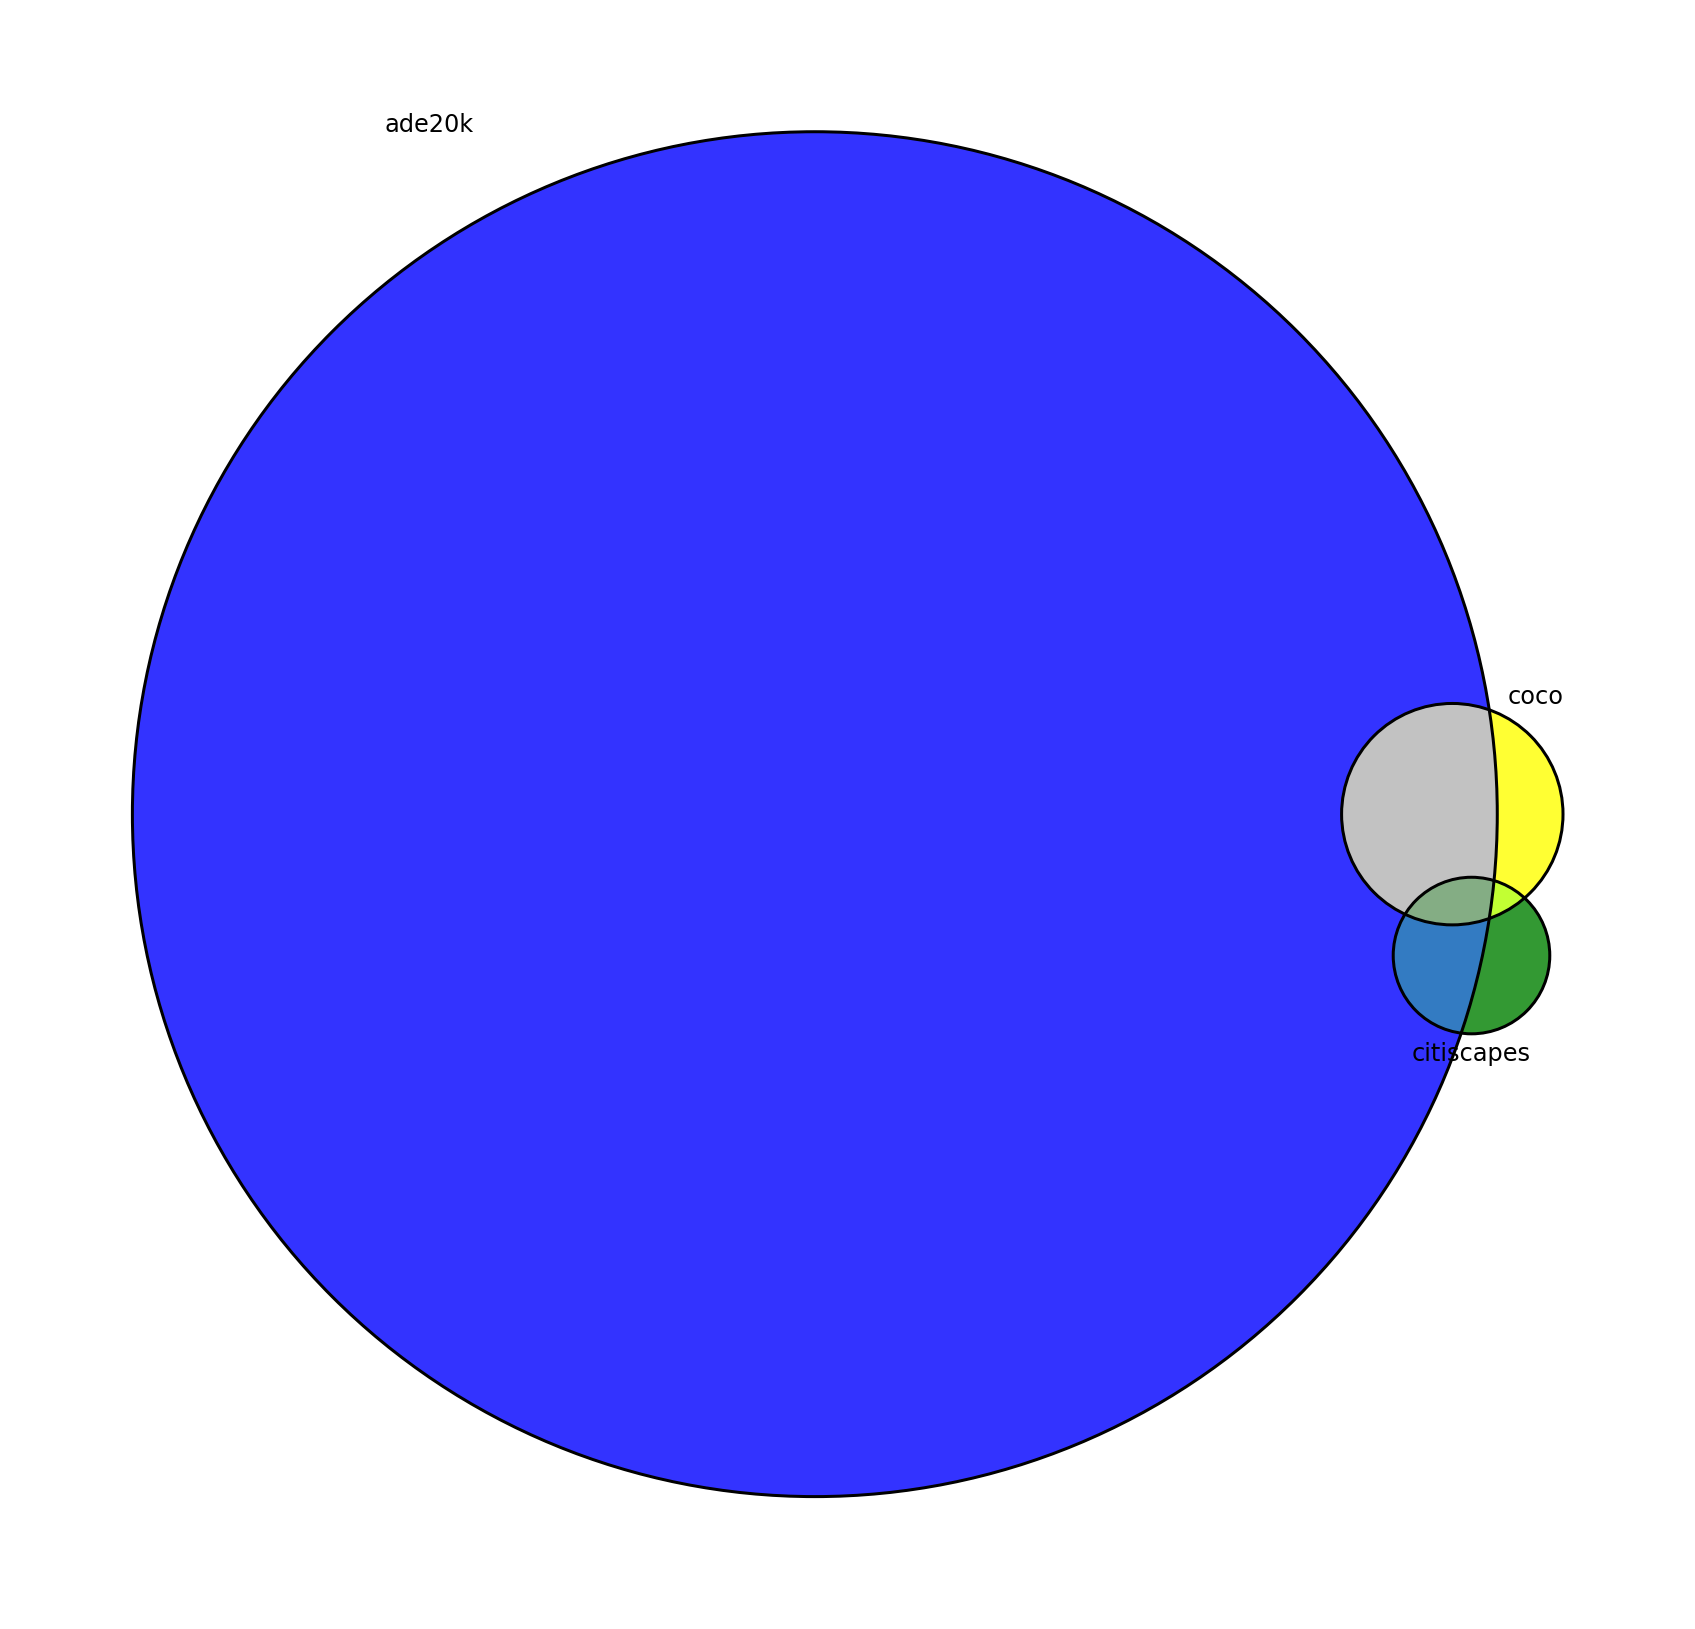

In [5]:
combinations_2 = itertools.combinations(dataset_filenames.keys(),3)
for comb in combinations_2:
    try:
        out = draw_word_venn_3(dataset_filenames, comb[0], comb[1], comb[2])
    except:
        print("Problem in rendering Word Venn's diagram",(comb[0], comb[1], comb[2]))

# Detail overview of datasets. 

The hypothesis was that combining datasets we can get a best semantic segmentation model. As we have seen, there is a lot of data which consists of the similar labels. Now I want to have a closer look at the datasets.

In [6]:
all_objects = {}
for name in dataset_filenames.keys():
    filename = dataset_filenames[name]
    all_objects[name]=get_dict_from_file(filename)

In [7]:
total_number_labels = {}
total_number_appearance = {}
for name in dataset_filenames.keys():
    total_number_labels[name] = len(all_objects[name].keys())
    total_number_appearance[name] = sum(all_objects[name].values())


Coco and Cocostuff has the biggest dataset about ~80K. Ade20K follows with ~22K.

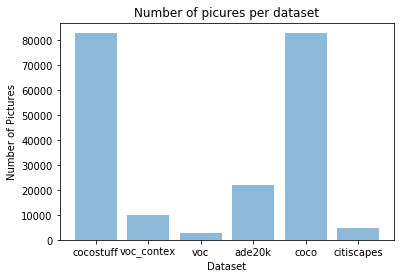

In [8]:
draw_bar_chart(total_number_labels.keys(), total_number_of_pictures.values(), "Number of Pictures", "Dataset", "Number of picures per dataset")

Ade20K has a lot of unique labels, but they are sparse. TODO: remove outliers which have small number of occurrences
Voc Context has cca 450 labels, but the most useful one is 54. 


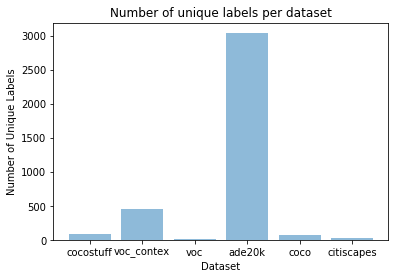

In [9]:
draw_bar_chart(total_number_labels.keys(), total_number_labels.values(), "Number of Unique Labels", "Dataset", "Number of unique labels per dataset")

This is a total number of labels in datasets. Coco has less than 100 unique labels, but about 800 000 occurrences through 82000 pictures.
Cityscapes also has dense segementation.

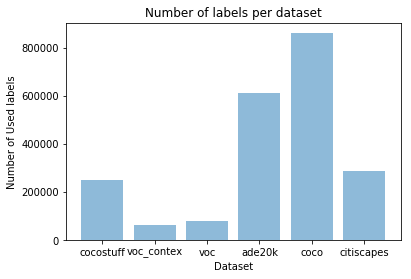

In [10]:
draw_bar_chart(total_number_labels.keys(), total_number_appearance.values(), "Number of Used labels", "Dataset", "Number of labels per dataset")

In [11]:
matrix = {}
for d1 in all_objects.keys():
    for d2 in all_objects.keys():
        matrix[(d1,d2)] = len(set(get_names_from_files(dataset_filenames[d1])).intersection(set(get_names_from_files(dataset_filenames[d2]))))
print("Intresection between datasets")
def get_alligned_str(total_len, string):
    spaces = total_len-len(string)
    before = spaces//2
    if (spaces%2==1):
        after = before+1
    else:
        after = before
    curr = ' '*before+ string+' '*after+"|"
    return curr
head = "|  dataset  |"
for d1 in all_objects.keys():
    head =head+get_alligned_str(11, d1)
print(head)
for d1 in all_objects.keys():
    line = '|'+ get_alligned_str(11, d1)
    for d2 in all_objects.keys():
        value = matrix[(d1,d2)]       
        line = line+get_alligned_str(11, str(round(value,3)))
    print(line)  

Intresection between datasets
|  dataset  | cocostuff |voc_contex |    voc    |  ade20k   |   coco    |citiscapes |
| cocostuff |   92.0    |   33.0    |    0.0    |   52.0    |    0.0    |    3.0    |
|voc_contex |   33.0    |   460.0   |   19.0    |   326.0   |   41.0    |   15.0    |
|    voc    |    0.0    |   19.0    |   20.0    |   16.0    |   14.0    |    5.0    |
|  ade20k   |   52.0    |   326.0   |   16.0    |  3040.0   |   59.0    |   23.0    |
|   coco    |    0.0    |   41.0    |   14.0    |   59.0    |   80.0    |    8.0    |
|citiscapes |    3.0    |   15.0    |    5.0    |   23.0    |    8.0    |   40.0    |


The matrix above shows the intersection among datasets. TODO: how many images per one intersection.

I would suggest using voc_context, coco, cocostuff and part of ade20k. 
Coco and cocostuff may be used as exclusive datasets.
Voc and Voc_context as subset one of the other.
Voc_context has a large intersection with coco, ade20k, cocostuff.
Ade20K and Voc_context intresects 326/460(for voc_context) labels. 

In [ ]:
unique_set= []
for d1 in all_objects.keys():
    unique_set.extend(all_objects[d1].keys())
unique_set = set(unique_set)

# Conclusion:
### Total number of uniquie labels through all 6 datasets: 3249
### Total number of pictures: 205792
### Total number of occurrence: 2 156 273


### If we would come with idea how to train on all datasets without losing information about each label, we can get the best segmentation model, which can extract 3000 labels. Pretty nice goal to follow!